In [3]:
import pandas as pd

df= pd.read_csv("df_sell_final.csv")
df = df.drop(['Unnamed: 0', 'wm_yr_wk_shift', 'd_num', 'd_shift'], axis =1)
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df_count = pd.read_csv("df_sell_count.csv")

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df

date  FOODS_1_001_CA_1_evaluation  FOODS_1_001_CA_2_evaluation  \
0    2011-01-29                         0.00                          0.0   
1    2011-01-30                         0.00                          0.0   
2    2011-01-31                         0.00                          0.0   
3    2011-02-01                         0.00                          0.0   
4    2011-02-02                         0.00                          0.0   
...         ...                          ...                          ...   
1936 2016-05-18                         0.00                          0.0   
1937 2016-05-19                         6.72                          0.0   
1938 2016-05-20                         6.72                          0.0   
1939 2016-05-21                         0.00                          0.0   
1940 2016-05-22                         2.24                          0.0   

      FOODS_1_001_CA_3_evaluation  FOODS_1_001_CA_4_evaluation  \
0                            0.00                         0.00   
1                            0.00                         0.00   
2                            0.00                         0.00   
3                            0.00                         0.00   
4                            0.00                         0.00   
...                           ...                          ...   
1936                         0.00                         2.24   
1937                         4.48                         6.72   
1938                         6.72                         0.00   
1939                         0.00                         4.48   
1940                         2.24                        13.44   

      FOODS_1_001_TX_1_evaluation  FOODS_1_001_TX_2_evaluation  \
0                            0.00                         0.00   
1                            0.00                         0.00   
2                            0.00                         0.00   
3                            0.00                         0.00   
4                            0.00                         0.00   
...                           ...                          ...   
1936                         0.00                         0.00   
1937                         0.00                         0.00   
1938                         4.48                        11.20   
1939                         2.24                         4.48   
1940                         0.00                         0.00   

      FOODS_1_001_TX_3_evaluation  FOODS_1_001_WI_1_evaluation  \
0                            0.00                        24.00   
1                            0.00                        30.00   
2                            0.00                         0.00   
3                            0.00                         0.00   
4                            0.00                         0.00   
...                           ...                          ...   
1936                         2.24                        11.20   
1937                         0.00                         8.96   
1938                         2.24                         2.24   
1939                         2.24                        89.60   
1940                         0.00                        71.68   

      FOODS_1_001_WI_2_evaluation  ...  month  year       d  event_name_1  \
0                            4.00  ...      1  2011     d_1      No_Event   
1                            0.00  ...      1  2011     d_2      No_Event   
2                           14.00  ...      1  2011     d_3      No_Event   
3                            6.00  ...      2  2011     d_4      No_Event   
4                            0.00  ...      2  2011     d_5      No_Event   
...                           ...  ...    ...   ...     ...           ...   
1936                         0.00  ...      5  2016  d_1937      No_Event   
1937                         0.00  ...      5  2016  d_1938      No_Event   
1938          

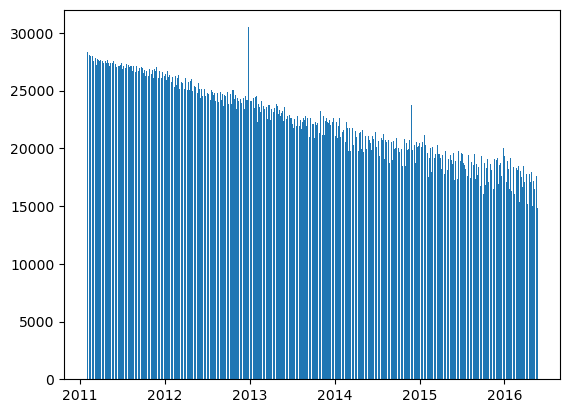

In [4]:
zero_check_df = (df ==0).sum(axis = 1)
zero_check_df
plt.bar(x=df['date'],height=zero_check_df.values)
plt.show()

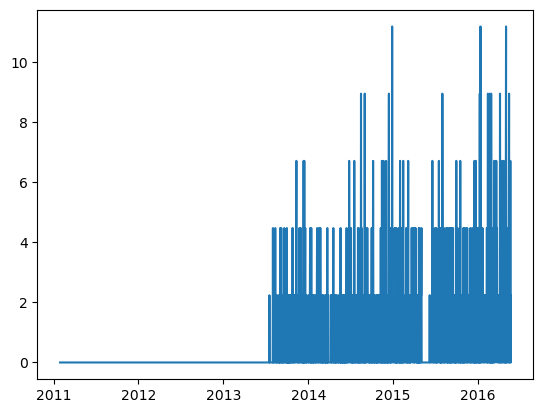

In [7]:
plt.plot(df['date'], df['FOODS_1_001_CA_1_evaluation'])
plt.show()

We can see that there are items that are not being sold until to some point

In [8]:
multi_items = ['FOODS_3_083_WI_3_evaluation', 'FOODS_3_084_WI_3_evaluation', 'FOODS_3_085_WI_3_evaluation']
#Find the first non-zero data of each item
for item in multi_items:
    print(df['date'][df[item] != 0].min())

2011-01-29 00:00:00
2014-01-11 00:00:00
2014-08-31 00:00:00


In [14]:
def sell_start_date(df,item):
    starting_date = df['date'][df[item] != 0].min()
    return starting_date

In [16]:
for item in multi_items:
    print(sell_start_date(df,item))

2011-01-29 00:00:00
2014-01-11 00:00:00
2014-08-31 00:00:00


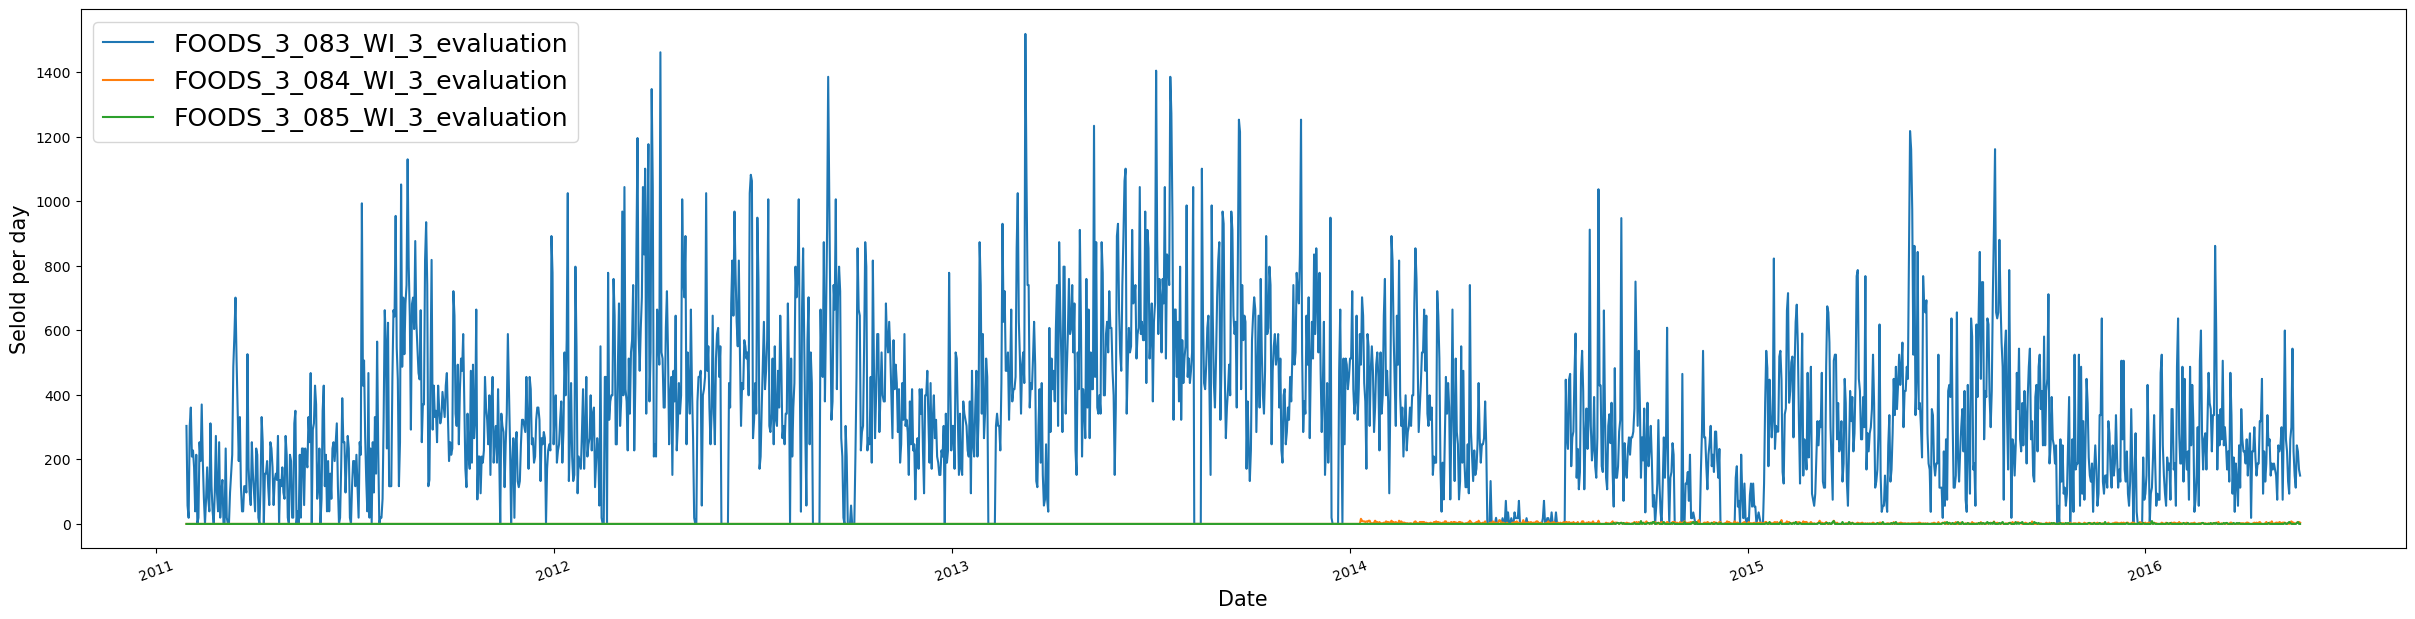

In [13]:

dim = (30,7)
plt.subplots(figsize = dim)

plt.plot(df['date'], df[multi_items], label = multi_items)
plt.legend(multi_items, prop ={'size':18})
plt.xticks (rotation = 20)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Selold per day', fontsize = 15)
plt.show()

In [33]:
df_test = df.copy()
multi_items = ['FOODS_3_083_WI_3_evaluation', 'FOODS_3_084_WI_3_evaluation', 'FOODS_3_085_WI_3_evaluation']

max_consecutive_zero = pd.DataFrame(columns=['item_ID', 'consecutive_zeros'])
max_consecutive_zero['item_ID'] = multi_items
for item in multi_items:
    consecutive_zeros =[]
    consecutive_zeros= (df[item] == 0).astype(int).groupby((df[item] != 0).cumsum()).cumsum()
    max_consecutive_zero['consecutive_zeros'].loc[max_consecutive_zero['item_ID'] == item] = consecutive_zeros.max()

In [34]:
max_consecutive_zero

item_ID consecutive_zeros
0  FOODS_3_083_WI_3_evaluation                14
1  FOODS_3_084_WI_3_evaluation              1078
2  FOODS_3_085_WI_3_evaluation              1310

In [30]:
def non_sale_day_max(df,item):
    consecutive_zeros =[]
    consecutive_zeros= (df[item] == 0).astype(int).groupby((df[item] != 0).cumsum()).cumsum()
    maximum_non_sale_date =  consecutive_zeros.max()
    return maximum_non_sale_date

In [35]:
df_test = df.copy()
multi_items = ['FOODS_3_083_WI_3_evaluation', 'FOODS_3_084_WI_3_evaluation', 'FOODS_3_085_WI_3_evaluation']

max_consecutive_zero = pd.DataFrame(columns=['item_ID', 'consecutive_zeros'])
max_consecutive_zero['item_ID'] = multi_items
for item in multi_items:
    max_consecutive_zero['consecutive_zeros'].loc[max_consecutive_zero['item_ID'] == item] = non_sale_day_max(df,item)

In [36]:
max_consecutive_zero

item_ID consecutive_zeros
0  FOODS_3_083_WI_3_evaluation                14
1  FOODS_3_084_WI_3_evaluation              1078
2  FOODS_3_085_WI_3_evaluation              1310

In [40]:
multi_items = ['FOODS_3_083_WI_3_evaluation', 'FOODS_3_084_WI_3_evaluation', 'FOODS_3_085_WI_3_evaluation']

max_consecutive_zero = pd.DataFrame(columns=['item_ID', 'consecutive_zeros'])

max_consecutive_zero['item_ID'] = multi_items
for item in multi_items:
    temp_df = df.loc[df['date'] >= sell_start_date(df, item)].copy()
    max_consecutive_zero['consecutive_zeros'].loc[max_consecutive_zero['item_ID'] == item] = non_sale_day_max(temp_df,item)

In [41]:
max_consecutive_zero

item_ID consecutive_zeros
0  FOODS_3_083_WI_3_evaluation                14
1  FOODS_3_084_WI_3_evaluation                 7
2  FOODS_3_085_WI_3_evaluation                42

In [43]:
all_items = []

for col in df.columns:
    if (len(col.split('_')) == 6):
        if (col.split('_')[5] == 'evaluation'):
            all_items.append(col)

In [45]:
max_consecutive_zero = pd.DataFrame(columns=['item_ID', 'consecutive_zeros'])

max_consecutive_zero['item_ID'] = multi_items
for item in all_items:
    temp_df = df.loc[df['date'] >= sell_start_date(df, item)].copy()
    max_consecutive_zero['consecutive_zeros'].loc[max_consecutive_zero['item_ID'] == item] = non_sale_day_max(temp_df,item)

In [46]:
max_consecutive_zero.loc[max_consecutive_zero['consecutive_zeros'].idmax()]

AttributeError: 'Series' object has no attribute 'idmax'

In [ ]:
for item in all_items:
    locater = max_consecutive_zero['consecutive_zeros'].loc[max_consecutive_zero['item_ID'] == item]
    if(locater < 7):
        

In [4]:
# single_df_linear = df.reset_index()
# single_df_linear

# single_df_linear = df.groupby(['event_name_1'])['d'].count().to_frame('event type')
# event_name_list = pd.DataFrame()
# event_name_list['event'] = single_df_linear.index

In [51]:
import numpy as np
data5 = {
    'date': pd.date_range('2023-01-01', '2023-02-16'),
    'item_id_1': [1, 2, 0, 0, 0, 3, 4, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 0, 0, 0, 0, 0, 0, 0],
    'item_id_2': [0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'item_id_3': [0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'item_id_4': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

df5 = pd.DataFrame(data5)


non_zero_indices = df5['item_id_1'].index[df5['item_id_1'] != 0]
consecutive_zeros = (df5['item_id_1'] == 0).astype(int).groupby((df5['item_id_1'] != 0).cumsum()).cumsum()
# Initialize to store non-zero counts
non_zero_count = pd.Series(index=df5['item_id_1'].index)  
modified_series = df5['item_id_1'].copy()
for i in consecutive_zeros.index:
    print(i)
# max_consecutive_zeros = consecutive_zeros.groupby((consecutive_zeros != 0).cumsum()).max()

# for i in consecutive_zeros.index:
#     if consecutive_zeros[i] > 0:
#         # Cou nt the number of non-zero values preceding consecutive zeros
#         non_zero_count.iloc[i] = len(non_zero_indices[:consecutive_zeros[i]])
#         #Find the average of preceding non-zero values
#         if (consecutive_zeros[i] > 1 and (max_consecutive_zeros[i] != max_consecutive_zeros[i-1])):
#             print(non_zero_indices[i] )
#             print(consecutive_zeros[i])
#             #non-zero conditions
#             if (non_zero_indices[i] > 30): 
#                 if (non_zero_indices[i] >= 7) and (non_zero_indices[i] < 14):
#                     avg_non_zero = np.mean(df5['item_id_1'][non_zero_indices[max(0, consecutive_zeros[i] - 7):consecutive_zeros[i]]])
#                 elif (non_zero_indices[i] >= 14) and (non_zero_indices[i] < 30):
#                     avg_non_zero = np.mean(df5['item_id_1'][non_zero_indices[max(0, consecutive_zeros[i] - 14):consecutive_zeros[i]]])
#                 elif (non_zero_indices[i] >= 30):
#                     avg_non_zero = np.mean(df5['item_id_1'][non_zero_indices[max(0, consecutive_zeros[i] - 30):consecutive_zeros[i]]])
#             elif (non_zero_indices[i] > 14): 
#                 if (non_zero_indices[i] >= 7) and (non_zero_indices[i] < 14):
#                     avg_non_zero = np.mean(df5['item_id_1'][non_zero_indices[max(0, consecutive_zeros[i] - 7):consecutive_zeros[i]]])
#                 elif (non_zero_indices[i] >= 14):
#                     avg_non_zero = np.mean(df5['item_id_1'][non_zero_indices[max(0, consecutive_zeros[i] - 14):consecutive_zeros[i]]])
#             elif (consecutive_zeros[i] > 7): 
#                 if (non_zero_indices[i] >= 7):
#                     avg_non_zero = np.mean(df5['item_id_1'][non_zero_indices[max(0, consecutive_zeros[i] - 7):consecutive_zeros[i]]])
#             else:
#                 avg_non_zero = np.mean(df5['item_id_1'][non_zero_indices[max(0, consecutive_zeros[i] - non_zero_indices[i]):consecutive_zeros[i]]])
#         #Replace consecutive zeros with the average
#         elif (consecutive_zeros[i] > 1 and (max_consecutive_zeros[i] == max_consecutive_zeros[i-1])):
#             modified_series[i] = avg_non_zero
#     else:
#         non_zero_count[i] = 0

# for item_id in df5.columns:
#     if (item_id != 'date'):
#         data5[item_id + '_modified'] = replace_consecutive_zeros_with_average(df5[item_id])


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46


In [50]:
consecutive_zeros

0     0
1     0
2     1
3     2
4     3
5     0
6     0
7     1
8     2
9     3
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    1
18    2
19    3
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    1
28    2
29    3
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    1
41    2
42    3
43    4
44    5
45    6
46    7
Name: item_id_1, dtype: int32

In [42]:
non_zero_indices

Index([ 0,  1,  5,  6, 10, 11, 12, 13, 14, 15, 16, 20, 21, 22, 23, 24, 25, 26,
       30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
      dtype='int64')

In [5]:
# event_name_list

event
0   Cultural
1   No_Event
2  Religious

In [6]:
# single_df_linear = df.groupby(['event_type_1'])['d'].count().to_frame('event type')
# event_type_list = pd.DataFrame()
# event_type_list['event_type'] = single_df_linear.index
# event_type_list

event_type
0   Cultural
1   No_Event
2  Religious

In [7]:
# single_df_linear = df.groupby(['weekday'])['d'].count().to_frame('Week days')
# weekday_list = pd.DataFrame()
# weekday_list['weekday'] = single_df_linear.index
# weekday_list

weekday
0     Friday
1     Monday
2   Saturday
3     Sunday
4   Thursday
5    Tuesday
6  Wednesday

In [8]:
# import numpy as np
# df['event_name_2_index'] = df.apply(lambda x: (np.where(x['event_name_2'] == event_name_list['event'])[0][0]), axis =1)
# df['event_type_1_index'] = df.apply(lambda x: (np.where(x['event_type_1'] == event_type_list['event_type'])[0][0]), axis =1)
# df['event_type_2_index'] = df.apply(lambda x: (np.where(x['event_type_2'] == event_type_list['event_type'])[0][0]), axis =1)
# df['weekday_index'] = df.apply(lambda x: (np.where(x['weekday'] == weekday_list['weekday'])[0][0]), axis =1)

In [9]:
# df = df.drop(['weekday','d','event_name_1','event_type_1','event_name_2','event_type_2'], axis =1)

Test to show with multiple items in 1 time serires graph

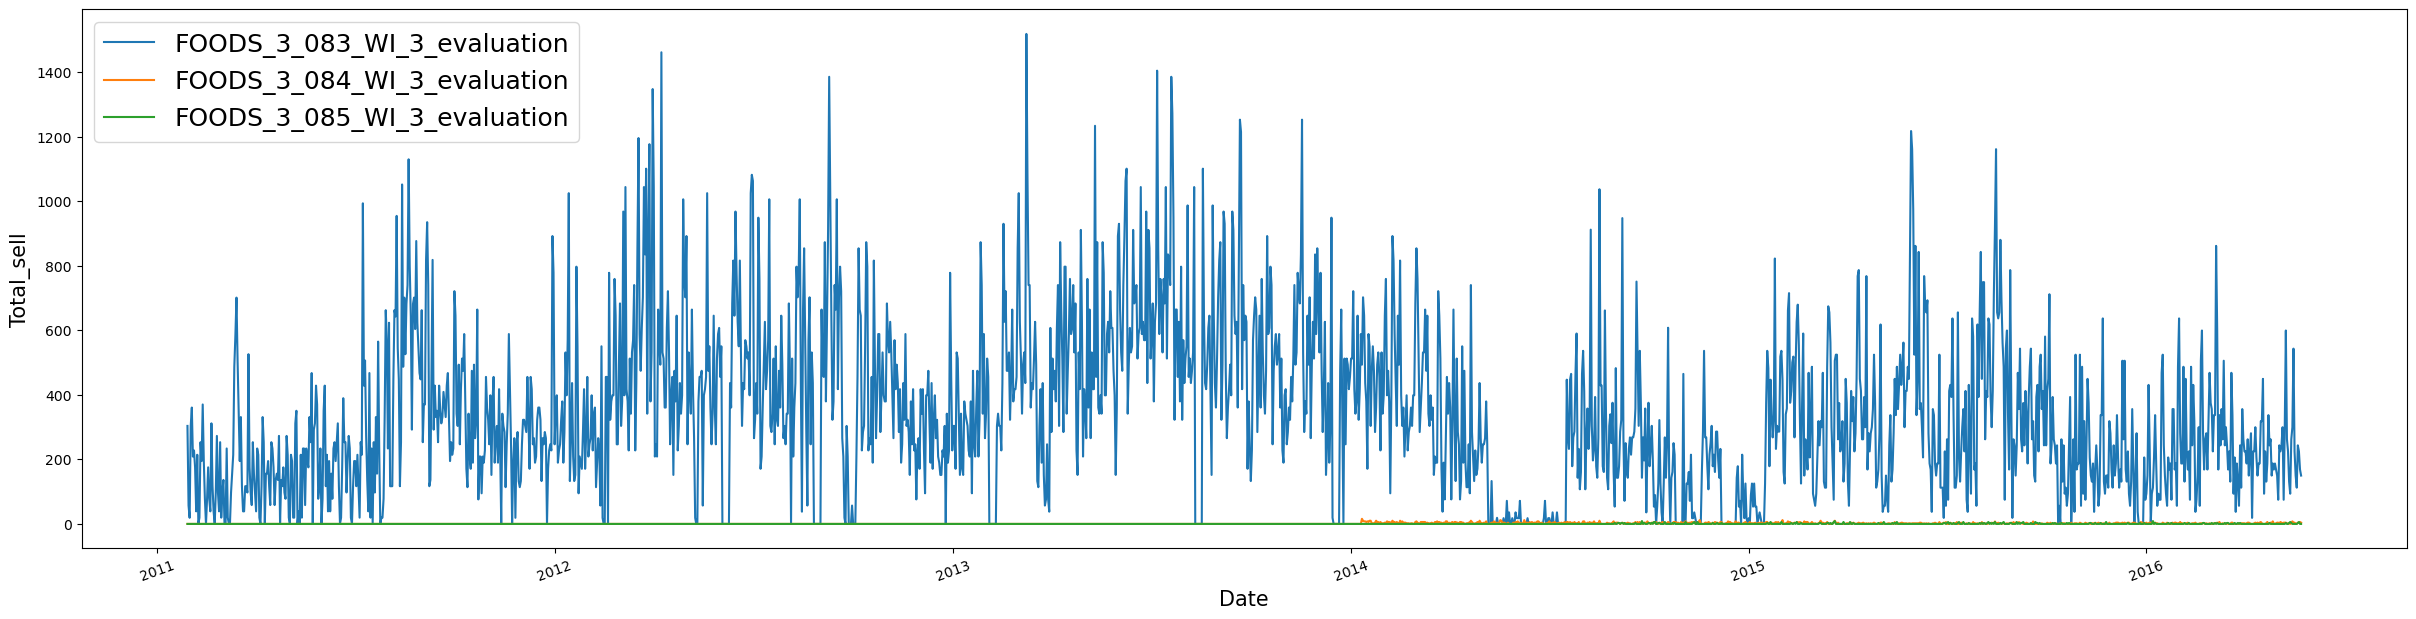

In [10]:
multi_items = ['FOODS_3_083_WI_3_evaluation', 'FOODS_3_084_WI_3_evaluation', 'FOODS_3_085_WI_3_evaluation']

dim = (30,7)
plt.subplots(figsize = dim)

for item in multi_items:
    plt.plot(df['date'], df[item], label = item)
plt.legend(multi_items, prop ={'size':18})
plt.xticks (rotation = 20)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Total_sell', fontsize = 15)
plt.show()

Testing with short term

In [11]:
df_test = df.copy()
df_test = df_test.set_index('date')
df_test = df_test.loc['2015/04/01':,:]

In [12]:
WI = []
TX = []
CA = []
items = []
calender = []

for col in df_test.columns:
    if (len(col.split('_')) == 6):
        if (col.split('_')[3] == 'WI'):
            WI.append(col)
        elif (col.split('_')[3] == 'TX'):
            TX.append(col)
        elif (col.split('_')[3] == 'CA'):
            CA.append(col)
        elif (col.split('_')[5] == 'evaluation'):
            items.append(col)
    else:
        calender.append(col)

create a list with all the stores

In [13]:
for col in df_test.columns:
    
    if (len(col.split('_')) == 6):
        if (col.split('_')[3] == 'WI'):
            WI.append(col)
        elif (col.split('_')[3] == 'TX'):
            TX.append(col)
        elif (col.split('_')[3] == 'CA'):
            CA.append(col)
        elif (col.split('_')[5] == 'evaluation'):
            items.append(col)
    else:
        calender.append(col)

In [14]:
eva_item =  "FOODS_3_083_WI_3_evaluation"
eva_df = df_test.loc[:,eva_item]

In [15]:
train = eva_df['2015/04/01':'2016/04/20']
test = eva_df['2016/04/21':]

In [16]:
train.loc[train == 0]

date
2015-10-12    0.0
2015-10-14    0.0
2015-10-24    0.0
2015-12-21    0.0
2015-12-25    0.0
2015-12-26    0.0
2015-12-27    0.0
2015-12-28    0.0
2015-12-29    0.0
2016-01-05    0.0
Name: FOODS_3_083_WI_3_evaluation, dtype: float64

Use autoarima

In [17]:
from pmdarima.arima import auto_arima
auto_model = auto_arima(y=train, start_p=0, start_q=0, max_p=5,
                        max_q=5, start_P=0, start_Q=0, max_P=5,
                        max_Q=5, m=1, max_order=None,
                        trace=True)
    

C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5214.308, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5162.692, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5105.984, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5212.312, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5093.283, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5095.283, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5095.283, Time=0.15 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5094.381, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5143.463, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5094.354, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5091.305, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5103.988, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=5160.694, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=5093.304, Time=0.08 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0]             : AIC=5093.304, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=5092.395, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=5141.462, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,2)(0,0,0)[0]             : AIC=5092.375, Time=0.17 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 1.270 seconds


In [18]:
prediction, confint = auto_model.predict(n_periods=test.size, return_conf_int=True)
prediction

C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

2016-04-21    194.294376
2016-04-22    210.704290
2016-04-23    214.966186
2016-04-24    216.073063
2016-04-25    216.360536
2016-04-26    216.435197
2016-04-27    216.454587
2016-04-28    216.459623
2016-04-29    216.460931
2016-04-30    216.461271
2016-05-01    216.461359
2016-05-02    216.461382
2016-05-03    216.461388
2016-05-04    216.461389
2016-05-05    216.461390
2016-05-06    216.461390
2016-05-07    216.461390
2016-05-08    216.461390
2016-05-09    216.461390
2016-05-10    216.461390
2016-05-11    216.461390
2016-05-12    216.461390
2016-05-13    216.461390
2016-05-14    216.461390
2016-05-15    216.461390
2016-05-16    216.461390
2016-05-17    216.461390
2016-05-18    216.461390
2016-05-19    216.461390
2016-05-20    216.461390
2016-05-21    216.461390
2016-05-22    216.461390
Freq: D, dtype: float64

In [19]:
confint

array([[-155.44346616,  544.03221881],
       [-166.06481559,  587.47339526],
       [-171.42683087,  601.3592032 ],
       [-176.89104223,  609.0371691 ],
       [-182.42507448,  615.14614603],
       [-187.92919548,  620.79958863],
       [-193.37228445,  626.28145862],
       [-198.74754492,  631.66679109],
       [-204.05505478,  636.9769168 ],
       [-209.2966632 ,  642.21920459],
       [-214.47459008,  647.39730791],
       [-219.59105426,  652.51381792],
       [-224.64818112,  657.57095668],
       [-229.64798504,  662.57076369],
       [-234.5923713 ,  667.51515076],
       [-239.48314255,  672.40592221],
       [-244.32200592,  677.24478564],
       [-249.1105799 ,  682.03335963],
       [-253.85040058,  686.77318032],
       [-258.54292742,  691.46570715],
       [-263.18954846,  696.1123282 ],
       [-267.79158518,  700.71436492],
       [-272.35029683,  705.27307656],
       [-276.86688446,  709.7896642 ],
       [-281.34249467,  714.2652744 ],
       [-285.77822293,  7

In [20]:
def APE(Y_actual, Y_Predicted):
    ape = (np.abs(Y_actual - Y_Predicted)/np.abs(Y_actual))*100
    return ape

In [21]:
def MAPE(Y_actual, Y_Predicted):
    mape = np.mean(APE(Y_actual, Y_Predicted))
    return mape

In [22]:
APE_df = pd.DataFrame(columns =['APE'])
MAPE_df = pd.DataFrame(columns =['id', 'MAPE'])
APE_df['APE'] = APE(test, prediction)
MAPE_df.loc[1] =[eva_item, MAPE(test, prediction)]

In [23]:
APE_df

APE
date                  
2016-04-21    3.734317
2016-04-22   37.502435
2016-04-23   11.714573
2016-04-24   17.598557
2016-04-25   44.394378
2016-04-26   15.555364
2016-04-27   28.406352
2016-04-28   15.568405
2016-04-29   28.410115
2016-04-30   44.461606
2016-05-01  188.923330
2016-05-02   11.100504
2016-05-03    3.692210
2016-05-04   11.100501
2016-05-05   27.769157
2016-05-06  188.923371
2016-05-07   27.769157
2016-05-08   63.884579
2016-05-09   17.450465
2016-05-10    3.692210
2016-05-11   65.099069
2016-05-12  131.138697
2016-05-13   17.450465
2016-05-14   27.769157
2016-05-15   60.148500
2016-05-16    3.692210
2016-05-17   44.461686
2016-05-18   92.615581
2016-05-19   11.100501
2016-05-20    3.692210
2016-05-21   28.410387
2016-05-22   44.461686

In [24]:
cf= pd.DataFrame(confint)

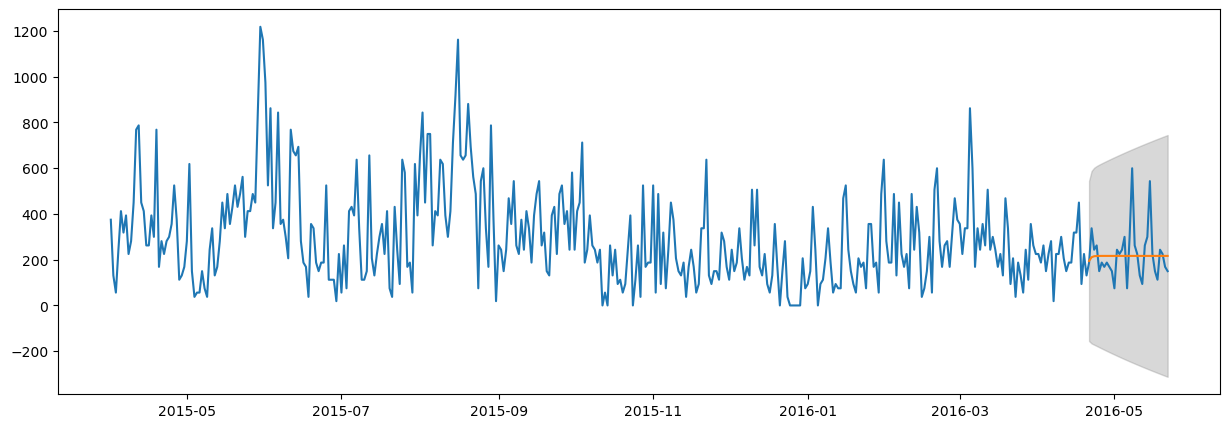

In [25]:
prediction_series = pd.Series(prediction,index=test.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(eva_df)
ax.plot(prediction_series)
ax.fill_between(prediction_series.index,
                cf[0],
                cf[1],color='grey',alpha=.3)

In [26]:
def add_to_table(table, name, extra_name, data, joining_indices):
    split_name = name.split("_")
    selected_elements = [split_name[idx] for idx in joining_indices]
    id_name = "_".join(selected_elements)
    id_name = id_name + extra_name
    
    if id_name in table:
        table[id_name] = table[id_name] + data
    else:
        table[id_name] = data

In [27]:
%%time
multi_items = ['FOODS_3_083_WI_3_evaluation', 'FOODS_3_084_WI_3_evaluation', 'FOODS_3_085_WI_3_evaluation']
df_test2 = df_test.loc[:,multi_items]

df_test2['actual_total'] = 0
df_test2['predicted_total'] = 0
for item in multi_items:
    df_test2['actual_total'] = df_test2['actual_total'] + df_test2[item]

train_df = df_test2['2016/04/01':'2016/05/15']
test_df = df_test2['2016/05/16':]

#Create a actual value dataframe and predicted value data frame
predicted_item = pd.DataFrame()
index_counter = 0
APE_df = pd.DataFrame()
MAPE_df = pd.DataFrame(columns =['id', 'MAPE'])
evaluating_data = pd.DataFrame()

joining_indices_store = [3,4]
joining_indices_item = [3,4,0,1]

for item in multi_items:
    #Create test and train table
    train = train_df.loc[:,item]
    test = test_df.loc[:,item]
    #Train the model
    auto_model = auto_arima(y=train, start_p=0, start_q=0, max_p=5,
                           max_q=5, start_P=0, start_Q=0, max_P=5,
                           max_Q=5, m=1, max_order=None,
                           trace=True)
    #Create a prediction
    prediction, confint = auto_model.predict(n_periods=test.size, return_conf_int=True)
    df_test2['predicted_total'] = df_test2['predicted_total'] + prediction
    new_column_name = f'{item}_predict'
    predicted_item[item] = prediction
    #Add APE to the table
    APE_df[item] = APE(test_df[item], prediction)
    #add MAPE to the table with item ID
    MAPE_df.loc[index_counter] =[item, MAPE(test_df[item], prediction)]
    
    #Modify the name of the predicted column
    forecast_column_name = f'{item}_predict'
    #Increment index counter to input to MAPE table
    index_counter = index_counter +1
    
    #create a column with store id
    add_to_table(evaluating_data,item,'_predict', prediction, joining_indices_store)
    add_to_table(evaluating_data,item,'_predict', prediction, joining_indices_item)
    add_to_table(evaluating_data,item,'', test, joining_indices_store)
    add_to_table(evaluating_data,item,'', test, joining_indices_item)    

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=553.605, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=554.863, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=554.777, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=627.711, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=556.771, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.056 seconds
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=200.754, Time=0.00 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=202.135, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=201.880, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=238.225, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.065 seconds
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=147.511, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=139.889, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=138.158, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=150.253, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=139.773, Time=0.01 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=139.538, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=140.631, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=138.955, Time=0.00 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.071 seconds
CPU times: total: 188 ms
Wa

C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

In [28]:
MAPE_df

id       MAPE
0  FOODS_3_083_WI_3_evaluation  36.196581
1  FOODS_3_084_WI_3_evaluation        inf
2  FOODS_3_085_WI_3_evaluation        inf

In [29]:
APE_df

FOODS_3_083_WI_3_evaluation  FOODS_3_084_WI_3_evaluation  \
date                                                                   
2016-05-16                     1.666667                    35.555556   
2016-05-17                    52.500000                          inf   
2016-05-18                   103.333333                          inf   
2016-05-19                     6.153846                    35.555556   
2016-05-20                     1.666667                    35.555556   
2016-05-21                    35.555556                    57.037037   
2016-05-22                    52.500000                    35.555556   

            FOODS_3_085_WI_3_evaluation  
date                                     
2016-05-16                          inf  
2016-05-17                          inf  
2016-05-18                          inf  
2016-05-19                    86.797490  
2016-05-20                    93.398745  
2016-05-21                          inf  
2016-05-22                          inf

In [30]:
evaluating_data

WI_3_predict  WI_3_FOODS_3_predict    WI_3  WI_3_FOODS_3
2016-05-16    231.404279            231.404279  228.72        228.72
2016-05-17    231.451435            231.451435  149.84        149.84
2016-05-18    231.451435            231.451435  112.38        112.38
2016-05-19    231.451435            231.451435  250.43        250.43
2016-05-20    231.451435            231.451435  234.68        234.68
2016-05-21    231.451435            231.451435  174.51        174.51
2016-05-22    231.451435            231.451435  153.80        153.80

In [31]:
predicted_item

FOODS_3_083_WI_3_evaluation  FOODS_3_084_WI_3_evaluation  \
2016-05-16                      228.506                        2.552   
2016-05-17                      228.506                        2.552   
2016-05-18                      228.506                        2.552   
2016-05-19                      228.506                        2.552   
2016-05-20                      228.506                        2.552   
2016-05-21                      228.506                        2.552   
2016-05-22                      228.506                        2.552   

            FOODS_3_085_WI_3_evaluation  
2016-05-16                     0.346279  
2016-05-17                     0.393435  
2016-05-18                     0.393435  
2016-05-19                     0.393435  
2016-05-20                     0.393435  
2016-05-21                     0.393435  
2016-05-22                     0.393435

In [32]:
df_test2.head(5)

FOODS_3_083_WI_3_evaluation  FOODS_3_084_WI_3_evaluation  \
date                                                                   
2015-04-01                       374.60                         1.98   
2015-04-02                       131.11                         1.98   
2015-04-03                        56.19                         0.00   
2015-04-04                       243.49                         0.00   
2015-04-05                       412.06                         3.96   

            FOODS_3_085_WI_3_evaluation  actual_total  predicted_total  
date                                                                    
2015-04-01                         0.00        376.58              NaN  
2015-04-02                         0.00        133.09              NaN  
2015-04-03                         0.00         56.19              NaN  
2015-04-04                         5.96        249.45              NaN  
2015-04-05                         0.00        416.02              NaN

In [33]:
def MAE(Y_actual, Y_Predicted):
    mae = np.mean(np.abs(Y_actual - Y_Predicted))
    return mae

In [34]:
%%time
multi_items = ['FOODS_3_083_WI_3_evaluation', 'FOODS_3_084_WI_3_evaluation', 'FOODS_3_085_WI_3_evaluation']
df_test2 = df_test.loc['2016/04/01':,multi_items]

df_test2['actual_total'] = 0
df_test2['predicted_total'] = 0
for item in multi_items:
    df_test2['actual_total'] = df_test2['actual_total'] + df_test2[item]

train_df = df_test2['2016/04/01':'2016/05/15']
test_df = df_test2['2016/05/01':]

#Create a actual value dataframe and predicted value data frame
predicted_item = pd.DataFrame()
index_counter = 0
APE_df = pd.DataFrame()
MAPE_MAE_df = pd.DataFrame(columns =['id', 'error', 'MAE or MAPE'])
evaluating_data = pd.DataFrame()

joining_indices_store = [3,4]
joining_indices_item = [3,4,0,1]
#Add items to the id

MAPE_MAE_df['id'] = multi_items
for item in multi_items:
    #Create test and train table
    train = train_df.loc[:,item]
    test = test_df.loc[:,item]
    #Train the model
    auto_model = auto_arima(y=train, start_p=0, start_q=0, max_p=5,
                           max_q=5, start_P=0, start_Q=0, max_P=5,
                           max_Q=5, m=1, max_order=None,
                           trace=True)
    #Create a prediction
    prediction, confint = auto_model.predict(n_periods=test.size, return_conf_int=True)
    new_column_name = f'{item}_predict'
    predicted_item[item] = prediction
    df_test2['predicted_total'] = df_test2['predicted_total'] + predicted_item[item]
    #Add APE to the table
    #APE_df[item] = APE(test_df[item], prediction)
    
    #Check for zero values in actual value
    #if zero value is found, find error value with MAE
    #if there is no zero then use MAPE
    if np.any(test_df[item] == 0.0):
       MAPE_MAE_df.loc[MAPE_MAE_df['id'] == item,'error'] = MAE(test_df[item], prediction)
       MAPE_MAE_df.loc[MAPE_MAE_df['id'] == item,'MAE or MAPE'] = 'MAE'
    else:
       MAPE_MAE_df.loc[MAPE_MAE_df['id'] == item,'error'] = MAPE(test_df[item], prediction)
       MAPE_MAE_df.loc[MAPE_MAE_df['id'] == item,'MAE or MAPE'] = 'MAPE'       
    
    #Modify the name of the predicted column
    forecast_column_name = f'{item}_predict'
    #Increment index counter to input to MAPE table
    index_counter = index_counter +1
    
    #create a column with store id
    add_to_table(evaluating_data,item,'_predict', prediction, joining_indices_store)
    add_to_table(evaluating_data,item,'_predict', prediction, joining_indices_item)
    add_to_table(evaluating_data,item,'', test, joining_indices_store)
    add_to_table(evaluating_data,item,'', test, joining_indices_item)    

C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=553.605, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=554.863, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=554.777, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=627.711, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=556.771, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.068 seconds
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=200.754, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=202.135, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=201.880, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=238.225, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.074 seconds
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=147.511, Time=0.00 sec
 ARIMA

C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,0,1)(0,0,0)[0]             : AIC=138.955, Time=0.01 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.074 seconds
CPU times: total: 93.8 ms
Wall time: 234 ms


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

In [35]:
df_test2.tail(10)

FOODS_3_083_WI_3_evaluation  FOODS_3_084_WI_3_evaluation  \
date                                                                   
2016-05-13                       262.22                         3.96   
2016-05-14                       299.68                         7.92   
2016-05-15                       543.17                         3.96   
2016-05-16                       224.76                         3.96   
2016-05-17                       149.84                         0.00   
2016-05-18                       112.38                         0.00   
2016-05-19                       243.49                         3.96   
2016-05-20                       224.76                         3.96   
2016-05-21                       168.57                         5.94   
2016-05-22                       149.84                         3.96   

            FOODS_3_085_WI_3_evaluation  actual_total  predicted_total  
date                                                                    
2016-05-13                         2.98        269.16              NaN  
2016-05-14                         0.00        307.60              NaN  
2016-05-15                         0.00        547.13              NaN  
2016-05-16                         0.00        228.72       231.404279  
2016-05-17                         0.00        149.84       231.451435  
2016-05-18                         0.00        112.38       231.451435  
2016-05-19                         2.98        250.43       231.451435  
2016-05-20                         5.96        234.68       231.451435  
2016-05-21                         0.00        174.51       231.451435  
2016-05-22                         0.00        153.80       231.451435

In [36]:
MAPE_MAE_df

id      error MAE or MAPE
0  FOODS_3_083_WI_3_evaluation  36.196581        MAPE
1  FOODS_3_084_WI_3_evaluation   2.017714         MAE
2  FOODS_3_085_WI_3_evaluation   1.439021         MAE

In [37]:
df_test2.head(10)

FOODS_3_083_WI_3_evaluation  FOODS_3_084_WI_3_evaluation  \
date                                                                   
2016-04-01                       224.76                         0.00   
2016-04-02                       187.30                         1.98   
2016-04-03                       262.22                         3.96   
2016-04-04                       149.84                         3.96   
2016-04-05                       224.76                         1.98   
2016-04-06                       280.95                         0.00   
2016-04-07                        18.73                         0.00   
2016-04-08                       224.76                         0.00   
2016-04-09                       224.76                         1.98   
2016-04-10                       299.68                         3.96   

            FOODS_3_085_WI_3_evaluation  actual_total  predicted_total  
date                                                                    
2016-04-01                          0.0        224.76              NaN  
2016-04-02                          0.0        189.28              NaN  
2016-04-03                          0.0        266.18              NaN  
2016-04-04                          0.0        153.80              NaN  
2016-04-05                          0.0        226.74              NaN  
2016-04-06                          0.0        280.95              NaN  
2016-04-07                          0.0         18.73              NaN  
2016-04-08                          0.0        224.76              NaN  
2016-04-09                          0.0        226.74              NaN  
2016-04-10                          0.0        303.64              NaN

In [38]:
predicted_item

FOODS_3_083_WI_3_evaluation  FOODS_3_084_WI_3_evaluation  \
2016-05-16                      228.506                        2.552   
2016-05-17                      228.506                        2.552   
2016-05-18                      228.506                        2.552   
2016-05-19                      228.506                        2.552   
2016-05-20                      228.506                        2.552   
2016-05-21                      228.506                        2.552   
2016-05-22                      228.506                        2.552   
2016-05-23                      228.506                        2.552   
2016-05-24                      228.506                        2.552   
2016-05-25                      228.506                        2.552   
2016-05-26                      228.506                        2.552   
2016-05-27                      228.506                        2.552   
2016-05-28                      228.506                        2.552   
2016-05-29                      228.506                        2.552   
2016-05-30                      228.506                        2.552   
2016-05-31                      228.506                        2.552   
2016-06-01                      228.506                        2.552   
2016-06-02                      228.506                        2.552   
2016-06-03                      228.506                        2.552   
2016-06-04                      228.506                        2.552   
2016-06-05                      228.506                        2.552   
2016-06-06                      228.506                        2.552   

            FOODS_3_085_WI_3_evaluation  
2016-05-16                     0.346279  
2016-05-17                     0.393435  
2016-05-18                     0.393435  
2016-05-19                     0.393435  
2016-05-20                     0.393435  
2016-05-21                     0.393435  
2016-05-22                     0.393435  
2016-05-23                     0.393435  
2016-05-24                     0.393435  
2016-05-25                     0.393435  
2016-05-26                     0.393435  
2016-05-27                     0.393435  
2016-05-28                     0.393435  
2016-05-29                     0.393435  
2016-05-30                     0.393435  
2016-05-31                     0.393435  
2016-06-01                     0.393435  
2016-06-02                     0.393435  
2016-06-03                     0.393435  
2016-06-04                     0.393435  
2016-06-05                     0.393435  
2016-06-06                     0.393435

In [39]:
MAPE_MAE_df = pd.DataFrame(columns =['id', 'error', 'MAE or MAPE'])
evaluating_data = pd.DataFrame()

joining_indices_store = [3,4]
joining_indices_item = [3,4,0,1]
MAPE_MAE_df['id'] = multi_items

In [40]:
MAPE_MAE_df

id error MAE or MAPE
0  FOODS_3_083_WI_3_evaluation   NaN         NaN
1  FOODS_3_084_WI_3_evaluation   NaN         NaN
2  FOODS_3_085_WI_3_evaluation   NaN         NaN

In [41]:
df_test3 = df.copy()
df_test3 = df_test3.set_index('date')

Now try with 250 items and longer time frame

In [42]:
import random
#Cerate a list of items from current table
items = []

for col in df_test3.columns:
    if (len(col.split('_')) == 6):
        if (col.split('_')[5] == 'evaluation'):
            items.append(col)

#Select random items from the list of total items
#Number of random values
n_random = 250
random_item = random.sample(items, n_random)

df_test2 = df_test3.loc['2015/04/01':,random_item]
df_test2['predicted_total'] = 0
df_test2['actual_total'] = 0

for item in random_item:
    df_test2['actual_total'] = df_test2['actual_total'] + df_test2[item]

train_df = df_test3.loc['2015/04/01':'2016/04/21',random_item]
#df_test2['2015/04/01':'2016/04/21']
test_df = df_test3.loc['2016/04/22':,random_item]
#df_test2['2016/04/22':]

#Create a actual value dataframe and predicted value data frame
predicted_item = pd.DataFrame()
index_counter = 0
MAPE_MAE_df = pd.DataFrame(columns =['id', 'error', 'MAE or MAPE'])
evaluating_data = pd.DataFrame()
cf_total= pd.DataFrame()
cf_total['low'] = 0
cf_total['high'] = 0
joining_indices_store = [3,4]
joining_indices_item = [3,4,0,1]

for item in random_item:
    #Create test and train table
    train = train_df.loc[:,item]
    test = test_df.loc[:,item]
    #Train the model
    auto_model = auto_arima(y=train, start_p=1, start_q=0, max_p=5,
                           max_q=5, start_P=1, start_Q=0, max_P=5,
                           max_Q=5, m=1, max_order=None,
                           trace=True, seasonal=True)
    #Create a prediction
    prediction, confint = auto_model.predict(n_periods=test.size, return_conf_int=True)
    cf= pd.DataFrame(confint)
    if np.any(cf_total) == 0:
        cf_total['low'] =  cf[0]
        cf_total['high'] = cf[1]

    elif np.any(np.isnan(cf)) == False:
        cf_total['low'] = cf_total['low'] + cf[0]
        cf_total['high'] = cf_total['high'] + cf[1]

    new_column_name = f'{item}_predict'
    predicted_item[item] = prediction
    df_test2['predicted_total'] = df_test2['predicted_total'] + predicted_item[item]
    #Check for zero values in actual value
    #if zero value is found, find error value with MAE
    #if there is no zero then use MAPE
    if np.any(test_df == 0.0):
        MAPE_MAE_df.loc[MAPE_MAE_df['id'] == item,'error'] = MAE(test_df[item], prediction)
        MAPE_MAE_df.loc[MAPE_MAE_df['id'] == item,'MAE or MAPE'] = 'MAE'
    else:
        MAPE_MAE_df.loc[MAPE_MAE_df['id'] == item,'error'] = MAPE(test_df[item], prediction)
        MAPE_MAE_df.loc[MAPE_MAE_df['id'] == item,'MAE or MAPE'] = 'MAPE'       

    #Modify the name of the predicted column
    forecast_column_name = f'{item}_predict'
    #Increment index counter to input to MAPE table
    index_counter = index_counter +1
    
    #create a column with store id
    add_to_table(evaluating_data,item,'_predict', prediction, joining_indices_store)
    add_to_table(evaluating_data,item,'_predict', prediction, joining_indices_item)
    add_to_table(evaluating_data,item,'', test, joining_indices_store)
    add_to_table(evaluating_data,item,'', test, joining_indices_item)  


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1421.110, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1424.146, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1421.918, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1483.750, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1419.115, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1415.709, Time=0.04 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=1416.593, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1412.529, Time=0.20 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1410.540, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1408.541, Time=0.09 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1410.540, Time=0.17 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1421.060, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1410.736, Time=0.05 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 1.092 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=827.452, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=825.463, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=827.452, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=873.903, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=827.968, Time=0.09 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.155 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1524.215, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1523.158, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1524.411, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1606.453, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1519.714, Time=0.09 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1519.700, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1519.468, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1520.829, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1521.494, Time=0.19 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1560.420, Time=0.01 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.470 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2909.234, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3015.191, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3013.191, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2885.753, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2858.736, Time=0.06 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2847.859, Time=0.06 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=2837.230, Time=0.12 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=2835.265, Time=0.06 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=2845.883, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,1)(0,0,0)[0]             : AIC=2792.593, Time=0.15 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=2790.613, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=2788.998, Time=0.07 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2788.182, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2787.440, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2787.306, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2787.654, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2907.235, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2787.365, Time=0.07 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.732 seconds
Performing stepwise search to minimize aic


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3120.314, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3194.690, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3027.693, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3192.697, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3018.487, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3019.471, Time=0.10 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3020.027, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3089.355, Time=0.09 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3018.066, Time=0.26 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3019.667, Time=0.21 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3020.851, Time=0.17 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=3022.764, Time=0.37 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=3016.327, Time=0.13 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0]             : AIC=3017.170, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=3017.907, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,2)(0,0,0)[0]             : AIC=3016.260, Time=0.17 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=3019.442, Time=0.08 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,1,2)(0,0,0)[0]             : AIC=3018.249, Time=0.24 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(3,1,3)(0,0,0)[0]             : AIC=3021.042, Time=0.31 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=3015.043, Time=0.19 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,3)(0,0,0)[0]             : AIC=3017.821, Time=0.25 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(2,1,4)(0,0,0)[0]             : AIC=3016.512, Time=0.38 sec
 ARIMA(1,1,4)(0,0,0)[0]             : AIC=3016.533, Time=0.16 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,4)(0,0,0)[0]             : AIC=inf, Time=0.41 sec

Best model:  ARIMA(2,1,3)(0,0,0)[0]          
Total fit time: 4.615 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=824.704, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=833.908, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=823.921, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=839.313, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=825.798, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=825.801, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=827.764, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=827.360, Time=0.02 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.273 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1966.707, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1965.021, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1966.707, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2117.315, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1968.683, Time=0.07 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.121 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2709.960, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2809.400, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2561.231, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2807.401, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2563.216, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2563.215, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2565.131, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2559.326, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2561.314, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2561.313, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2707.961, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2563.228, Time=0.09 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.553 seconds
Performing stepwise search to minimize aic


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1211.345, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1209.835, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1211.344, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1320.201, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1213.312, Time=0.08 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.132 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1219.010, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1314.887, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1312.891, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1177.269, Time=0.02 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1156.030, Time=0.03 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1132.766, Time=0.04 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=1126.707, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=1124.723, Time=0.04 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=1130.780, Time=0.03 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=1067.151, Time=0.12 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,1,1)(0,0,0)[0]             : AIC=1065.388, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=1064.280, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1062.851, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1061.657, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1059.667, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1061.656, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1217.015, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1062.672, Time=0.13 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.685 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3781.976, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3889.300, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3649.396, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3887.300, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3651.387, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3651.387, Time=0.07 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3653.237, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3647.878, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3649.878, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3649.878, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3779.976, Time=0.02 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0]             : AIC=3651.745, Time=0.09 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.581 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2813.638, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2812.354, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2813.787, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2889.198, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2810.471, Time=0.07 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2808.668, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2808.648, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2807.965, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=2809.817, Time=0.10 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2808.277, Time=0.19 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=2810.200, Time=0.25 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=2854.451, Time=0.03 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Total fit time: 0.902 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2079.434, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2077.945, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2079.291, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2270.300, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2078.679, Time=0.11 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.154 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=694.953, Time=0.02 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=823.782, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=821.782, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=648.084, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=632.180, Time=0.03 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=622.812, Time=0.05 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=610.771, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=608.835, Time=0.04 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=620.870, Time=0.03 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=552.852, Time=0.13 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,1,1)(0,0,0)[0]             : AIC=551.925, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=550.755, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=548.771, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=546.776, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,1)(0,0,0)[0]             : AIC=545.696, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=546.785, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=692.974, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=548.823, Time=0.11 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.800 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1424.861, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1550.751, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1321.051, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1548.754, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1322.943, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1322.956, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1323.978, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1319.160, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1321.052, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1321.065, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1422.862, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1322.087, Time=0.05 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.426 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2228.463, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2282.533, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2135.129, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2280.534, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2122.154, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2123.474, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2123.919, Time=0.10 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2122.617, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2218.554, Time=0.03 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2123.231, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2120.621, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2133.448, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2226.465, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2121.914, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2122.378, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2121.049, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=2216.557, Time=0.02 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,2)(0,0,0)[0]             : AIC=2121.705, Time=0.10 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 0.805 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3841.847, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3889.292, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3852.145, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4206.368, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3838.122, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=3834.488, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=3835.185, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=3835.785, Time=0.19 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3837.371, Time=0.13 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=3837.163, Time=0.12 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=3875.545, Time=0.04 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Total fit time: 0.752 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2123.163, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2124.382, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2122.998, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2138.212, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2124.837, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2124.839, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2126.837, Time=0.10 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2133.977, Time=0.01 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.261 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1609.302, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1731.996, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1474.103, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1729.996, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1474.584, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1474.529, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1472.294, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1472.726, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1472.666, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1607.304, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.10 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.611 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1343.301, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1452.081, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1223.394, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1450.107, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1225.066, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1225.097, Time=0.07 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1226.830, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1221.479, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1223.166, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1223.194, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1341.336, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1224.909, Time=0.07 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.507 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2285.863, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2283.866, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2285.863, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2357.246, Time=0.00 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2287.863, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.072 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1495.478, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1493.711, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1495.478, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1733.966, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1497.478, Time=0.05 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.101 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2464.906, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2463.241, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2464.888, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2553.440, Time=0.00 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2457.996, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2468.673, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2466.622, Time=0.12 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2466.573, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2466.666, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.842 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2064.019, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2142.128, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1963.011, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2140.128, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1964.918, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1964.884, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1964.380, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1961.011, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1962.918, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1962.884, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2062.019, Time=0.00 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1962.380, Time=0.07 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.376 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1688.820, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1687.141, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1688.823, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1924.512, Time=0.00 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1688.772, Time=0.20 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.253 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3031.399, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3074.248, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3039.949, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3261.191, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3030.648, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=3032.050, Time=0.08 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3016.609, Time=0.19 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3029.936, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=3034.055, Time=0.07 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3022.059, Time=0.27 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=3016.826, Time=0.18 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=3018.878, Time=0.05 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 1.305 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3102.427, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3203.559, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3015.589, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3201.567, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3014.996, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3014.767, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3063.740, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3014.559, Time=0.11 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3060.892, Time=0.05 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=3013.904, Time=0.13 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=3049.239, Time=0.11 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=3015.864, Time=0.19 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3014.714, Time=0.18 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=3039.778, Time=0.15 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=3012.096, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=3012.830, Time=0.08 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=3047.244, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,1)(0,0,0)[0]             : AIC=3014.065, Time=0.13 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,2)(0,0,0)[0]             : AIC=3014.078, Time=0.26 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=3058.904, Time=0.06 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=3012.966, Time=0.12 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,0)(0,0,0)[0]             : AIC=3037.780, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(5,1,2)(0,0,0)[0]             : AIC=inf, Time=0.37 sec

Best model:  ARIMA(4,1,1)(0,0,0)[0]          
Total fit time: 3.184 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2872.660, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2931.980, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2750.587, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2930.015, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2749.694, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2744.612, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2816.717, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2746.434, Time=0.08 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2746.405, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2786.278, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2748.153, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2744.613, Time=0.04 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 0.740 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3854.814, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3910.746, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3826.541, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3908.746, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3822.319, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3823.891, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3842.130, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3820.322, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3824.542, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3852.815, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=3810.596, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=3840.131, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=0.15 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=3836.844, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,2)(0,0,0)[0]             : AIC=3810.589, Time=0.27 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,2)(0,0,0)[0]             : AIC=inf, Time=0.26 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(3,1,3)(0,0,0)[0]             : AIC=inf, Time=0.33 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(2,1,3)(0,0,0)[0]             : AIC=inf, Time=0.26 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=inf, Time=0.19 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,1,3)(0,0,0)[0]             : AIC=inf, Time=0.42 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec

Best model:  ARIMA(3,1,2)(0,0,0)[0]          
Total fit time: 3.489 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2286.949, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2285.162, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2286.972, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2465.824, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2288.672, Time=0.11 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.167 seconds
Performing stepwise search to minimize aic


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2335.655, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2429.704, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2236.881, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2427.705, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2232.071, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2231.838, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2321.045, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2230.745, Time=0.14 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2307.628, Time=0.06 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=2230.330, Time=0.13 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2289.428, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=2232.320, Time=0.19 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=2230.840, Time=0.14 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2235.711, Time=0.21 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=2287.715, Time=0.08 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=2232.798, Time=0.24 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=2230.386, Time=0.08 sec

Best model:  ARIMA(4,1,1)(0,0,0)[0] intercept
Total fit time: 1.631 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2291.069, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2396.726, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2394.726, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2264.136, Time=0.04 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2246.731, Time=0.04 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2226.826, Time=0.05 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=2201.834, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=2138.062, Time=0.17 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=2137.800, Time=0.14 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=2136.160, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=2139.607, Time=0.07 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=2224.829, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,1)(0,0,0)[0]             : AIC=2136.241, Time=0.11 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,2)(0,0,0)[0]             : AIC=2137.069, Time=0.33 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=2244.733, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,2)(0,0,0)[0]             : AIC=2137.505, Time=0.19 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=2199.840, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,2)(0,0,0)[0]             : AIC=2129.827, Time=0.30 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(5,1,3)(0,0,0)[0]             : AIC=2133.281, Time=0.43 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,3)(0,0,0)[0]             : AIC=2142.831, Time=0.40 sec

Best model:  ARIMA(5,1,2)(0,0,0)[0]          
Total fit time: 3.960 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=718.128, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=785.699, Time=0.02 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=783.699, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=678.426, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=650.980, Time=0.04 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=642.591, Time=0.05 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=639.185, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=637.199, Time=0.04 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=640.601, Time=0.03 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=594.147, Time=0.13 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,1,1)(0,0,0)[0]             : AIC=592.153, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=591.444, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=589.562, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=587.870, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,1)(0,0,0)[0]             : AIC=594.604, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=716.128, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=589.546, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=587.551, Time=0.05 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=589.545, Time=0.07 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,3)(0,0,0)[0]             : AIC=589.373, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0]          
Total fit time: 2.187 seconds
Performing stepwise search to minimize aic


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3729.878, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3732.028, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3730.157, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3993.439, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3731.692, Time=0.07 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3731.813, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3733.074, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3858.808, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.400 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3608.317, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3663.968, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3568.977, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3661.968, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3555.656, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3565.290, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3556.927, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3559.880, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3565.987, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3554.744, Time=0.14 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3533.797, Time=0.18 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3566.819, Time=0.16 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=3530.807, Time=0.32 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=3529.075, Time=0.17 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=3563.296, Time=0.08 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=3530.670, Time=0.22 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3566.426, Time=0.08 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=3555.970, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=3532.761, Time=0.40 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=3527.452, Time=0.13 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,1)(0,0,0)[0]             : AIC=3564.824, Time=0.11 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=3561.305, Time=0.02 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=3528.985, Time=0.14 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,1,2)(0,0,0)[0]             : AIC=3529.137, Time=0.23 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=3564.432, Time=0.04 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=3532.528, Time=0.12 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=3553.983, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,2)(0,0,0)[0]             : AIC=3531.092, Time=0.33 sec

Best model:  ARIMA(4,1,1)(0,0,0)[0]          
Total fit time: 3.339 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2338.783, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2403.304, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2205.691, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2401.308, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2203.921, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2202.294, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2299.955, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2202.889, Time=0.10 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2199.060, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2203.920, Time=0.08 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2200.423, Time=0.26 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2200.544, Time=0.32 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2200.174, Time=0.19 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=2197.311, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2202.229, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2200.590, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,2)(0,0,0)[0]             : AIC=2198.675, Time=0.19 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(2,1,3)(0,0,0)[0]             : AIC=2186.742, Time=0.32 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=2198.425, Time=0.12 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,3)(0,0,0)[0]             : AIC=inf, Time=0.28 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(2,1,4)(0,0,0)[0]             : AIC=2196.606, Time=0.29 sec
 ARIMA(1,1,4)(0,0,0)[0]             : AIC=2200.005, Time=0.15 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,4)(0,0,0)[0]             : AIC=inf, Time=0.42 sec

Best model:  ARIMA(2,1,3)(0,0,0)[0]          
Total fit time: 3.711 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1667.780, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1833.566, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1546.758, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1831.569, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1540.835, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1541.824, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1542.206, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1541.778, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1619.684, Time=0.02 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1543.768, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1538.934, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1544.889, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1665.784, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1539.933, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1540.309, Time=0.10 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1539.878, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1617.690, Time=0.02 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1541.879, Time=0.12 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 1.014 seconds
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-8197.746, Time=0.02 sec
Total fit time: 0.023 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=219.252, Time=0.02 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=218.011, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=219.206, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=252.457, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=221.093, Time=0.06 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.134 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1724.056, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1730.198, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1725.081, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1876.461, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1724.697, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1718.874, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1726.058, Time=0.10 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1726.130, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1724.392, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1722.873, Time=0.16 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1724.449, Time=0.05 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.644 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2347.519, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2441.856, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2266.300, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2439.859, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2259.825, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2258.256, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2324.333, Time=0.02 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2260.245, Time=0.12 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2263.096, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2266.906, Time=0.07 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2313.155, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2259.444, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2256.334, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2257.922, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=2322.349, Time=0.01 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=2258.321, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,2)(0,0,0)[0]             : AIC=2261.195, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2345.535, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2265.013, Time=0.04 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=2311.178, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,2)(0,0,0)[0]             : AIC=2257.516, Time=0.15 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0]          
Total fit time: 1.352 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1284.153, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1284.592, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1284.217, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1332.645, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1286.069, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1282.242, Time=0.09 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1284.158, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1284.147, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1286.163, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1285.917, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1286.611, Time=0.04 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.627 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1985.536, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2094.295, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1823.616, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2092.295, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1824.995, Time=0.07 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1824.939, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1827.598, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1821.786, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1823.134, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1823.075, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1983.536, Time=0.02 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1823.544, Time=0.10 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.489 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-493.447, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-495.444, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-493.447, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-496.443, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-491.447, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.096 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2315.526, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2313.526, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2315.525, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2430.401, Time=0.00 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2315.860, Time=0.08 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.134 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2608.907, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2723.866, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2496.976, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2721.866, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2498.503, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2498.561, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2498.778, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2495.035, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2496.562, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2496.620, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2606.909, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2496.837, Time=0.06 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.453 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1656.287, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1655.392, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1656.333, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1723.828, Time=0.00 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1658.177, Time=0.05 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.095 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1269.688, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1392.777, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1390.780, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1235.706, Time=0.02 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1184.638, Time=0.04 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1177.000, Time=0.04 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=1143.405, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=1141.531, Time=0.04 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=1175.067, Time=0.03 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=1097.136, Time=0.11 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,1,1)(0,0,0)[0]             : AIC=1099.520, Time=0.08 sec
 ARIMA(5,1,2)(0,0,0)[0]             : AIC=1097.480, Time=0.19 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,1,2)(0,0,0)[0]             : AIC=1098.285, Time=0.14 sec

Best model:  ARIMA(5,1,1)(0,0,0)[0]          
Total fit time: 1.621 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2404.869, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2404.668, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2404.892, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2584.402, Time=0.00 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2403.748, Time=0.19 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2405.621, Time=0.24 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2405.486, Time=0.25 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2406.870, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2406.857, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2406.672, Time=0.24 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2409.069, Time=0.04 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 1.106 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2485.675, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2594.517, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2372.064, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2592.517, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2374.056, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2374.056, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2376.063, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2370.077, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2372.069, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2372.069, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2483.676, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2374.076, Time=0.04 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.375 seconds
Performing stepwise search to minimize aic


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3644.757, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3738.981, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3507.058, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3736.981, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3508.529, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3508.502, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3505.610, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3507.136, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3507.109, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3642.757, Time=0.02 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.11 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.548 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1595.895, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1712.057, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1450.235, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1710.057, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1451.279, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1451.241, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1452.003, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1448.274, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1449.316, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1449.277, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1593.896, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1450.043, Time=0.08 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.511 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1431.539, Time=0.02 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1527.932, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1333.259, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1525.933, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1331.097, Time=0.08 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1331.763, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1332.548, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1331.646, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1412.039, Time=0.03 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1333.261, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1330.563, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1332.677, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1429.558, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1331.218, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1332.009, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1331.110, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1410.068, Time=0.02 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1332.723, Time=0.10 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 0.976 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2917.995, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2916.159, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2917.995, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3083.336, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2920.001, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.110 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-340.999, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-341.498, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-341.100, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-304.090, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-339.201, Time=0.06 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.152 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3324.246, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3322.344, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3324.244, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3618.074, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3326.247, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.136 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1801.532, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1799.536, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1801.532, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1842.744, Time=0.00 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1803.529, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.076 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=770.692, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=769.428, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=770.715, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=827.220, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=772.022, Time=0.10 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.171 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2782.898, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2781.509, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2782.898, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2976.950, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2784.897, Time=0.06 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.118 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1120.963, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1231.078, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1229.080, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1047.777, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1028.167, Time=0.04 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1015.226, Time=0.04 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=1016.141, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=1013.309, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=1026.231, Time=0.02 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=1014.229, Time=0.04 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=969.302, Time=0.08 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,1)(0,0,0)[0]             : AIC=967.427, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=969.219, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,2)(0,0,0)[0]             : AIC=968.019, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1045.822, Time=0.02 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=966.480, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=967.200, Time=0.08 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,3)(0,0,0)[0]             : AIC=968.212, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=967.627, Time=0.04 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=966.745, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,3)(0,0,0)[0]             : AIC=969.308, Time=0.26 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0]          
Total fit time: 2.645 seconds
Performing stepwise search to minimize aic


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2382.018, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2380.481, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2381.918, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2486.377, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2383.169, Time=0.06 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.130 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=778.439, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=777.294, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=778.333, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=845.951, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=779.136, Time=0.07 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.139 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=792.138, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=944.881, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=698.446, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=942.881, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=694.961, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=696.246, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=696.623, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=695.582, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=744.824, Time=0.03 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=698.842, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=693.339, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=696.890, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=790.153, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=694.658, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0]             : AIC=695.014, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=693.958, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=742.854, Time=0.02 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=697.211, Time=0.07 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 0.807 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2105.132, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2110.119, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2104.930, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2138.054, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2106.926, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2106.922, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2108.763, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2125.786, Time=0.01 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.186 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2366.482, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2446.634, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2242.848, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2444.640, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2243.763, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2243.584, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2243.069, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2241.153, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2242.134, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2241.961, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2364.498, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2241.398, Time=0.07 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.471 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2567.448, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2653.783, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2435.616, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2651.786, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2435.612, Time=0.07 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2437.481, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2437.476, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2435.547, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2437.481, Time=0.13 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2439.546, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2433.554, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2433.627, Time=0.02 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2435.484, Time=0.07 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=2435.489, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2433.619, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,3)(0,0,0)[0]             : AIC=2437.469, Time=0.14 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0]          
Total fit time: 1.044 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2010.625, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2009.507, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2010.411, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2233.221, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2011.500, Time=0.06 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.107 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2614.620, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2745.939, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2524.526, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2743.939, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2526.501, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2526.506, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2527.613, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2522.616, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2524.592, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2524.596, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2612.621, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2525.703, Time=0.06 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.389 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1393.149, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1391.643, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1393.163, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1419.324, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1388.667, Time=0.13 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1390.610, Time=0.19 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1390.606, Time=0.17 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1395.085, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1395.062, Time=0.07 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1391.164, Time=0.25 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1390.149, Time=0.04 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.938 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2266.607, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2349.705, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2347.705, Time=0.00 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2214.711, Time=0.04 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2186.441, Time=0.05 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2173.109, Time=0.08 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=2169.971, Time=0.07 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=2167.972, Time=0.04 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=2171.109, Time=0.04 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=2120.202, Time=0.13 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,1,1)(0,0,0)[0]             : AIC=2118.302, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=2116.880, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2115.075, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2114.219, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2113.221, Time=0.02 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2114.095, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2264.607, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.05 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.635 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1698.091, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1696.331, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1698.091, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1828.366, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1700.091, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.077 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2765.487, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2839.708, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2698.496, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2837.708, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2696.582, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2698.547, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2698.562, Time=0.09 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2696.779, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2741.488, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2700.457, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2694.585, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2696.502, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2763.488, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2696.549, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2696.564, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2694.782, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=2739.491, Time=0.02 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,2)(0,0,0)[0]             : AIC=2698.458, Time=0.08 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 0.737 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2793.023, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2804.957, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2793.367, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3317.805, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2794.952, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2794.681, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2796.535, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2949.480, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.335 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1666.034, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1671.816, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1666.656, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1882.883, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1667.413, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1666.850, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1668.427, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1771.205, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.356 seconds


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2521.304, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2527.257, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2521.953, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2668.257, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2522.682, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2522.676, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2524.626, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2599.862, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.279 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2378.024, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2510.772, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2508.772, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2334.209

C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2324.287, Time=0.05 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2316.769, Time=0.07 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=2311.908, Time=0.09 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=2309.927, Time=0.04 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=2314.788, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,1)(0,0,0)[0]             : AIC=2259.331, Time=0.13 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=2257.805, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=2256.420, Time=0.08 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2255.650, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2256.007, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=2332.225, Time=0.02 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=2257.129, Time=0.14 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2376.032, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2258.043, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=2322.304, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,2)(0,0,0)[0]             : AIC=2257.973, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0]          
Total fit time: 2.182 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1679.099, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1781.891, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1528.512, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1779.891, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1530.512, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1530.512, Time=0.07 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1530.432, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1527.197, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1529.192, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1529.192, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1677.104, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1529.102, Time=0.11 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.657 seconds


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=124.745, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=160.452, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=132.447, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=210.571, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=121.762, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=121.470, Time=0.05 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=123.235, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=123.085, Time=0.11 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=119.417, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=119.618, Time=0.06 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=122.501, Time=0.12 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=119.799, Time=0.18 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=120.449, Time=0.27 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=123.852, Time=0.06 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 1.210 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1778.751, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1864.952, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1648.773, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1862.956, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1650.143, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1650.080, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1652.003, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1648.267, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1649.667, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1649.606, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1776.761, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1651.527, Time=0.07 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.436 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3042.451, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3058.168, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3039.441, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3402.990, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3041.351, Time=0.08 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=3041.274, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=3042.853, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3260.252, Time=0.02 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.394 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1813.700, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1922.458, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1920.458, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1759.139, Time=0.02 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1720.846, Time=0.04 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1717.085, Time=0.06 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=1712.624, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=1710.627, Time=0.04 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=1715.086, Time=0.03 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=1652.387, Time=0.12 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,1,1)(0,0,0)[0]             : AIC=1652.481, Time=0.10 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(5,1,2)(0,0,0)[0]             : AIC=1653.261, Time=0.40 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,2)(0,0,0)[0]             : AIC=1653.629, Time=0.21 sec

Best model:  ARIMA(5,1,1)(0,0,0)[0]          
Total fit time: 2.048 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2372.089, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2370.145, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2372.081, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2420.478, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2372.477, Time=0.06 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.116 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3412.394, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3506.632, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3438.300, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3791.072, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3404.761, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=3391.970, Time=0.08 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=3391.029, Time=0.11 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=3392.049, Time=0.14 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=3380.464, Time=0.28 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=3378.673, Time=0.20 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3377.819, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3382.057, Time=0.08 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3378.470, Time=0.17 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=3376.957, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=3428.365, Time=0.07 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=3378.446, Time=0.18 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=3414.796, Time=0.10 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=3380.300, Time=0.05 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 2.158 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2338.102, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2419.322, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2187.716, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2417.328, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2189.639, Time=0.07 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2189.617, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2191.122, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2186.565, Time=0.02 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2188.501, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2188.482, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2336.113, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2189.995, Time=0.08 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.538 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2763.202, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2862.863, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2668.748, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2860.907, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2670.694, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2670.693, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2666.770, Time=0.10 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2667.277, Time=0.16 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2667.057, Time=0.18 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2672.693, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2672.689, Time=0.07 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2658.630, Time=0.23 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2666.098, Time=0.19 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=2666.212, Time=0.51 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=2664.170, Time=0.13 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2667.785, Time=0.18 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=2662.848, Time=0.43 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=2658.244, Time=0.19 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,3)(0,0,0)[0]             : AIC=2666.649, Time=0.14 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=2666.864, Time=0.11 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,3)(0,0,0)[0]             : AIC=2665.653, Time=0.12 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(2,1,4)(0,0,0)[0]             : AIC=2665.753, Time=0.27 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2666.292, Time=0.06 sec
 ARIMA(1,1,4)(0,0,0)[0]             : AIC=2663.691, Time=0.09 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,2)(0,0,0)[0]             : AIC=2667.342, Time=0.13 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(3,1,4)(0,0,0)[0]             : AIC=2662.202, Time=0.33 sec

Best model:  ARIMA(2,1,3)(0,0,0)[0]          
Total fit time: 3.844 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1313.164, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1312.350, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1312.994, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1392.209, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1314.828, Time=0.06 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.111 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2044.041, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2148.307, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2146.332, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1997.426, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1972.022, Time=0.05 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1941.384, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=1940.717, Time=0.09 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=1938.790, Time=0.04 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=1939.452, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,1)(0,0,0)[0]             : AIC=1901.248, Time=0.13 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=1904.664, Time=0.09 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,2)(0,0,0)[0]             : AIC=1902.670, Time=0.16 sec
 ARIMA(4,1,2)(0,0,0)[0]             : AIC=1905.730, Time=0.15 sec

Best model:  ARIMA(5,1,1)(0,0,0)[0]          
Total fit time: 1.718 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2047.936, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2046.559, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2048.056, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2071.978, Time=0.00 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2047.759, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.092 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2780.143, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2824.858, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2692.279, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2822.858, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2678.225, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2678.237, Time=0.08 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2679.114, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2677.219, Time=0.04 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2679.017, Time=0.09 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2674.255, Time=0.16 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2677.816, Time=0.23 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=2675.411, Time=0.19 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=2677.495, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2679.216, Time=0.15 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=2676.729, Time=0.24 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=2672.526, Time=0.11 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=2677.278, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2677.365, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,3)(0,0,0)[0]             : AIC=2676.025, Time=0.19 sec
 ARIMA(1,1,4)(0,0,0)[0]             : AIC=2673.636, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2675.458, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,4)(0,0,0)[0]             : AIC=2675.650, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=2677.514, Time=0.11 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,4)(0,0,0)[0]             : AIC=2674.898, Time=0.15 sec

Best model:  ARIMA(1,1,3)(0,0,0)[0]          
Total fit time: 2.354 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1982.538, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2136.320, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1886.757, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2134.383, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1882.777, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1883.284, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1883.448, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1883.583, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1944.257, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1885.216, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1881.246, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1885.198, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1980.610, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1881.727, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1881.901, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1882.056, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1942.400, Time=0.02 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1883.660, Time=0.07 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 0.699 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1473.516, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1630.725, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1628.725, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1442.016, Time=0.02 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1429.995, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1425.389, Time=0.04 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=1399.098, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=1397.098, Time=0.05 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=1423.389, Time=0.03 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=1337.235, Time=0.11 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,1,1)(0,0,0)[0]             : AIC=1341.983, Time=0.09 sec
 ARIMA(5,1,2)(0,0,0)[0]             : AIC=1338.415, Time=0.19 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,1,2)(0,0,0)[0]             : AIC=1346.458, Time=0.16 sec

Best model:  ARIMA(5,1,1)(0,0,0)[0]          
Total fit time: 1.622 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3022.386, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3020.764, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3022.404, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3145.600, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3024.294, Time=0.10 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.164 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1889.946, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1892.242, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1888.394, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2067.830, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1888.387, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1883.188, Time=0.09 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1882.944, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1882.743, Time=0.05 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=1884.702, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1884.718, Time=0.12 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=1886.699, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1976.112, Time=0.02 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Total fit time: 0.578 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1873.271, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2033.472, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1775.969, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2031.477, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1768.123, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1770.123, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1760.391, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1768.008, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1759.560, Time=0.21 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1765.693, Time=0.21 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1756.690, Time=0.24 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1759.037, Time=0.20 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=1757.869, Time=0.27 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=1758.031, Time=0.24 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1758.585, Time=0.19 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=1753.428, Time=0.45 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(3,1,5)(0,0,0)[0] intercept   : AIC=1754.211, Time=0.49 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(2,1,5)(0,0,0)[0] intercept   : AIC=1759.462, Time=0.37 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=1758.538, Time=0.32 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=0.56 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(3,1,4)(0,0,0)[0]             : AIC=1752.087, Time=0.42 sec
 ARIMA(2,1,4)(0,0,0)[0]             : AIC=1756.352, Time=0.19 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,3)(0,0,0)[0]             : AIC=1756.188, Time=0.19 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,4)(0,0,0)[0]             : AIC=1754.628, Time=0.47 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(3,1,5)(0,0,0)[0]             : AIC=1752.853, Time=0.51 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=1755.023, Time=0.16 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,5)(0,0,0)[0]             : AIC=1757.771, Time=0.25 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,3)(0,0,0)[0]             : AIC=1756.854, Time=0.23 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,5)(0,0,0)[0]             : AIC=inf, Time=0.53 sec

Best model:  ARIMA(3,1,4)(0,0,0)[0]          
Total fit time: 7.541 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4240.051, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4302.209, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4164.784, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4300.210, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4165.555, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4164.686, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4157.711, Time=0.10 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4150.446, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4153.761, Time=0.10 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4136.836, Time=0.19 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4155.608, Time=0.16 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=4137.454, Time=0.28 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=4137.823, Time=0.25 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=4124.282, Time=0.47 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(3,1,5)(0,0,0)[0] intercept   : AIC=4139.129, Time=0.54 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(2,1,5)(0,0,0)[0] intercept   : AIC=4139.279, Time=0.45 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=0.58 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(3,1,4)(0,0,0)[0]             : AIC=4125.163, Time=0.36 sec

Best model:  ARIMA(3,1,4)(0,0,0)[0] intercept
Total fit time: 5.391 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1019.282, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1018.205, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1019.178, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1035.718, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.231 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2453.816, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2554.533, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2552.537, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2412.028, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2396.098, Time=0.04 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2376.298, Time=0.05 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=2360.605, Time=0.08 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=2358.681, Time=0.06 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=2374.352, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,1)(0,0,0)[0]             : AIC=2320.983, Time=0.16 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=2319.118, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=2318.129, Time=0.07 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2316.137, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2314.162, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2312.376, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2314.159, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2451.829, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2315.043, Time=0.15 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.769 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1707.849, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1770.383, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1663.758, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1768.383, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1645.885, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1643.949, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1661.766, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1632.897, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1633.880, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1632.600, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1631.344, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1699.546, Time=0.01 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=1631.349, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1705.849, Time=0.01 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=1694.474, Time=0.02 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,2)(0,0,0)[0]             : AIC=inf, Time=0.27 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0]          
Total fit time: 1.970 seconds


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3149.965, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3229.225, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3014.417, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3227.225, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3013.216, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3014.832, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3015.037, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3013.063, Time=0.08 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=3015.006, Time=0.12 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3014.872, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3011.679, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3012.980, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=3013.650, Time=0.09 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,3)(0,0,0)[0]             : AIC=3013.613, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3011.835, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,3)(0,0,0)[0]             : AIC=3013.507, Time=0.17 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0]          
Total fit time: 1.241 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1180.616, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1308.847, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1306.847, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1131.691, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1106.691, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1091.971, Time=0.05 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=1082.601, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=1080.601, Time=0.04 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=1089.971, Time=0.03 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=1038.752, Time=0.12 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,1,1)(0,0,0)[0]             : AIC=1037.083, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=1035.422, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1033.759, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1031.987, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1030.875, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1032.032, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1178.616, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1033.875, Time=0.11 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.730 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4029.903, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4057.843, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3931.590, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4055.844, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3929.596, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3897.204, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0]             : AIC=3898.135, Time=0.09 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=inf, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,3)(0,0,0)[0]             : AIC=3895.955, Time=0.20 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(2,1,3)(0,0,0)[0]             : AIC=inf, Time=0.35 sec
 ARIMA(1,1,4)(0,0,0)[0]             : AIC=3886.752, Time=0.13 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,4)(0,0,0)[0]             : AIC=3888.259, Time=0.12 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(2,1,4)(0,0,0)[0]             : AIC=inf, Time=0.31 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(1,1,5)(0,0,0)[0]             : AIC=3888.492, Time=0.32 sec
 ARIMA(0,1,5)(0,0,0)[0]             : AIC=3888.027, Time=0.15 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,5)(0,0,0)[0]             : AIC=inf, Time=0.49 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=3888.752, Time=0.20 sec

Best model:  ARIMA(1,1,4)(0,0,0)[0]          
Total fit time: 3.066 seconds
Performing stepwise search to minimize aic


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1412.287, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1410.913, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1412.377, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1440.101, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1410.779, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1412.192, Time=0.08 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1412.226, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1411.850, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1411.509, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1414.042, Time=0.15 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1417.660, Time=0.05 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.551 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2115.337, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2246.838, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2060.094, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2244.859, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2059.688, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2045.472, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2110.138, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2044.538, Time=0.12 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2091.428, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=2046.049, Time=0.16 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2046.219, Time=0.28 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2044.290, Time=0.14 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2057.596, Time=0.09 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2046.185, Time=0.16 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2044.772, Time=0.12 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2048.171, Time=0.30 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=2043.026, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2055.786, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2044.430, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,2)(0,0,0)[0]             : AIC=2044.902, Time=0.12 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=2044.860, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2058.038, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,3)(0,0,0)[0]             : AIC=2043.327, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=2043.161, Time=0.07 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,3)(0,0,0)[0]             : AIC=2046.853, Time=0.20 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0]          
Total fit time: 2.463 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3640.931, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3660.691, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3648.212, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3788.271, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3618.647, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=3618.448, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=3620.439, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=3620.445, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3618.629, Time=0.10 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=3622.439, Time=0.12 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=3643.558, Time=0.03 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Total fit time: 0.588 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1912.219, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2037.600, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2035.607, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1874.698, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1846.632, Time=0.04 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1839.716, Time=0.05 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=1834.366, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=1832.393, Time=0.04 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=1837.735, Time=0.03 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=1765.268, Time=0.12 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,1,1)(0,0,0)[0]             : AIC=1765.818, Time=0.09 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(5,1,2)(0,0,0)[0]             : AIC=1767.493, Time=0.29 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,2)(0,0,0)[0]             : AIC=1765.864, Time=0.22 sec

Best model:  ARIMA(5,1,1)(0,0,0)[0]          
Total fit time: 1.809 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1280.311, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1282.942, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1281.387, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1431.477, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1273.168, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1273.352, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1262.120, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1260.330, Time=0.15 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1262.139, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1275.600, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1263.726, Time=0.20 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1263.847, Time=0.04 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.816 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2823.660, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2886.910, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2773.303, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2884.910, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2762.870, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2769.076, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2766.005, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2806.787, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2760.871, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2771.303, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2821.660, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2758.926, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=2804.787, Time=0.02 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,1)(0,0,0)[0]             : AIC=2759.821, Time=0.10 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2767.076, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,0)(0,0,0)[0]             : AIC=2794.534, Time=0.03 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=2756.143, Time=0.15 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,1,2)(0,0,0)[0]             : AIC=2758.141, Time=0.18 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(3,1,3)(0,0,0)[0]             : AIC=inf, Time=0.31 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(2,1,3)(0,0,0)[0]             : AIC=inf, Time=0.25 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=2760.786, Time=0.14 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,1,3)(0,0,0)[0]             : AIC=inf, Time=0.41 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec

Best model:  ARIMA(3,1,2)(0,0,0)[0]          
Total fit time: 2.886 seconds
Performing stepwise search to minimize aic


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1337.299, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1335.306, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1337.299, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1361.521, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1339.303, Time=0.07 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.120 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2088.281, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2086.282, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2088.281, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2155.629, Time=0.00 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2089.150, Time=0.06 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.114 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2232.232, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2327.490, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2094.026, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2325.501, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2092.940, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2093.768, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2093.765, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2230.262, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2095.765, Time=0.10 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.827 seconds


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3256.339, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3387.650, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3116.735, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3385.650, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3116.768, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3116.792, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3118.685, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3114.743, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3114.772, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3114.795, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3254.339, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=3116.689, Time=0.07 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.474 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=269

C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2553.679, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2768.253, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2554.186, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2553.958, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2554.835, Time=0.08 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2551.722, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2552.222, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2551.993, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2689.115, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2552.873, Time=0.05 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.420 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1871.165, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1977.518, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1726.985, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1975.520, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1728.710, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1728.689, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1730.975, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1725.076, Time=0.02 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1726.796, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1726.774, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1869.167, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1729.061, Time=0.07 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.410 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1177.858, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1326.406, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1324.415, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1153.457, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1131.711, Time=0.04 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1119.861, Time=0.04 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=1102.687, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=1100.704, Time=0.03 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=1117.877, Time=0.03 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=1049.659, Time=0.13 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,1,1)(0,0,0)[0]             : AIC=1048.080, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=1046.263, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1046.169, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1047.027, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1151.471, Time=0.02 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1045.520, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1043.574, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1047.237, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,3)(0,0,0)[0]             : AIC=1045.524, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1046.467, Time=0.04 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=1046.543, Time=0.07 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,3)(0,0,0)[0]             : AIC=1047.483, Time=0.21 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0]          
Total fit time: 2.313 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1847.527, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1847.996, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1846.706, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1936.333, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1850.268, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1843.400, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1845.305, Time=0.07 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=1845.271, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1845.569, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1931.860, Time=0.02 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0] intercept
Total fit time: 0.416 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2927.282, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2925.284, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2927.281, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3047.483, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2929.280, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.104 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1759.725, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1876.272, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1624.559, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1874.274, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1626.558, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1626.558, Time=0.07 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1624.614, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1624.657, Time=0.02 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.429 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2231.133, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2340.770, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2089.585, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2338.770, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2091.581, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2091.581, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2093.523, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2087.890, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2089.882, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2089.882, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2229.133, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2091.823, Time=0.07 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.427 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2500.258, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2599.745, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2392.010, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2597.745, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2392.245, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2392.403, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2390.234, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2390.502, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2390.656, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2498.258, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.18 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.666 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1556.135, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1639.916, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1415.095, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1637.932, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1417.084, Time=0.08 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1417.081, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1419.094, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1413.825, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1415.819, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1415.817, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1554.164, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1417.270, Time=0.09 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.462 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2177.476, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2263.608, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2118.044, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2261.619, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2113.974, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2113.104, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2160.481, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2114.948, Time=0.09 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2119.192, Time=0.12 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2152.219, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2114.520, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2111.246, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2112.123, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=2158.518, Time=0.02 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=2113.095, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2175.506, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2117.334, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=2150.265, Time=0.02 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,2)(0,0,0)[0]             : AIC=2112.658, Time=0.15 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0]          
Total fit time: 1.511 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1321.710, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1319.776, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1321.711, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1375.198, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1322.867, Time=0.10 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.152 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2338.697, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2337.992, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2338.494, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2383.176, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.175 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=653.459, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=651.869, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=653.485, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=767.192, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=654.083, Time=0.16 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.236 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1484.970, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1484.167, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1484.808, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1792.543, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1484.236, Time=0.09 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.137 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3058.741, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3056.906, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3058.718, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3140.035, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3060.404, Time=0.08 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.151 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3800.013, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3914.070, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3912.071, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3764.958, Time=0.04 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3741.831, Time=0.06 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=3714.474, Time=0.08 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=3699.310, Time=0.11 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=3697.314, Time=0.07 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,1,0)(0,0,0)[0]             : AIC=3712.477, Time=0.05 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=3626.533, Time=0.18 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,1,1)(0,0,0)[0]             : AIC=3624.944, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=3627.849, Time=0.11 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,1,2)(0,0,0)[0]             : AIC=3626.227, Time=0.26 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=3739.832, Time=0.04 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=3634.585, Time=0.15 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,2)(0,0,0)[0]             : AIC=3628.185, Time=0.27 sec

Best model:  ARIMA(4,1,1)(0,0,0)[0]          
Total fit time: 2.031 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2786.480, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2786.455, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2786.387, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2927.148, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2788.309, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2788.249, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2788.308, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2910.408, Time=0.02 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.310 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3068.814, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3067.122, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3068.725, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3253.104, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3066.556, Time=0.10 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3066.759, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=3066.797, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=3065.711, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=3066.639, Time=0.08 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=3068.647, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=3199.562, Time=0.03 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0] intercept
Total fit time: 0.608 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1666.390, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1744.323, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1561.858, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1742.323, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1558.742, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1560.741, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1560.741, Time=0.11 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1558.842, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1634.114, Time=0.02 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1562.742, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1556.938, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1559.940, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1664.390, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1558.938, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1558.938, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1557.014, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1632.114, Time=0.02 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1560.777, Time=0.11 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 0.839 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1179.981, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1252.833, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1082.274, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1250.833, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1080.829, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1082.183, Time=0.07 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1082.435, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1080.557, Time=0.06 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1082.342, Time=0.10 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1082.602, Time=0.29 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1078.565, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1080.280, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1080.444, Time=0.05 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=1080.350, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1078.837, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,3)(0,0,0)[0]             : AIC=1080.613, Time=0.12 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0]          
Total fit time: 1.010 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1928.744, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2041.373, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1790.524, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2039.376, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1792.162, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1792.150, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1792.224, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1788.568, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1790.205, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1790.192, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1926.745, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1790.291, Time=0.12 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.592 seconds
Performing stepwise search to minimize aic


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2828.406, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2940.960, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2938.960, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2794.804, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2741.952, Time=0.06 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2733.853, Time=0.09 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=2707.178, Time=0.07 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=2651.706, Time=0.16 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=2656.438, Time=0.15 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=2653.704, Time=0.27 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=2656.917, Time=0.20 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,1)(0,0,0)[0]             : AIC=2650.037, Time=0.12 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=2655.158, Time=0.09 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=2705.185, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,2)(0,0,0)[0]             : AIC=2652.036, Time=0.19 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=2731.857, Time=0.04 sec
 ARIMA(4,1,2)(0,0,0)[0]             : AIC=2655.687, Time=0.15 sec

Best model:  ARIMA(5,1,1)(0,0,0)[0]          
Total fit time: 1.837 seconds
Performing stepwise search to minimize aic


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3050.538, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3048.890, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3050.501, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3091.774, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3050.509, Time=0.11 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.167 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3020.943, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3020.565, Time=0.00 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3020.861, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3238.199, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3020.202, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3024.668, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=3024.663, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=3022.662, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3022.667, Time=0.06 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3026.691, Time=0.12 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.544 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2711.373, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2813.675, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2548.639, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2811.675, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2550.126, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2550.039, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2551.474, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2546.815, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2548.269, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2548.174, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2709.373, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2549.632, Time=0.05 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.430 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1981.834, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2077.377, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1818.560, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2075.380, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1820.033, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1819.893, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1813.939, Time=0.17 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1815.831, Time=0.21 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1815.766, Time=0.22 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1817.843, Time=0.11 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1818.236, Time=0.12 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1811.943, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1817.901, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1818.041, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1813.835, Time=0.13 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=1813.769, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1816.564, Time=0.02 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=1815.869, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1816.256, Time=0.05 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=1816.626, Time=0.17 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0]          
Total fit time: 1.995 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2641.885, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2639.960, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2641.883, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2809.713, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2643.885, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.095 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1116.553, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1233.367, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1231.370, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1072.728, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1025.353, Time=0.04 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1014.226, Time=0.05 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=1008.048, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=1006.051, Time=0.04 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=1012.227, Time=0.03 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=964.898, Time=0.12 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,1,1)(0,0,0)[0]             : AIC=962.927, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=965.241, Time=0.07 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,1,2)(0,0,0)[0]             : AIC=964.901, Time=0.23 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=1023.353, Time=0.02 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=964.560, Time=0.11 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,2)(0,0,0)[0]             : AIC=966.028, Time=0.37 sec

Best model:  ARIMA(4,1,1)(0,0,0)[0]          
Total fit time: 2.184 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2050.264, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2158.116, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1893.518, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2156.116, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1895.365, Time=0.07 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1895.356, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1896.806, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1892.448, Time=0.02 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1894.276, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1894.267, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2048.264, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1895.745, Time=0.09 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.596 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2306.699, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2424.921, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2189.307, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2422.924, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2191.236, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2191.242, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2191.586, Time=0.14 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2189.440, Time=0.02 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.350 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2798.288, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2801.765, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2798.883, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2991.646, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2799.159, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2792.589, Time=0.11 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2801.159, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2794.407, Time=0.18 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2799.307, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2802.019, Time=0.03 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.757 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1755.341, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1855.919, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1634.191, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1853.933, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1636.140, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1636.134, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1637.848, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1632.262, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1634.211, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1634.204, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1753.378, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1635.919, Time=0.08 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.456 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1947.088, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1945.222, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1947.099, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2024.387, Time=0.00 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1948.810, Time=0.11 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.157 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1701.367, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1703.100, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1701.768, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1781.946, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1702.101, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1702.504, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1704.095, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1755.252, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.193 seconds
Performing stepwise search to minimize aic


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2662.606, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2763.359, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2505.927, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2761.359, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2507.887, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2507.883, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2509.677, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2505.181, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2507.134, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2507.130, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2660.606, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2508.928, Time=0.03 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.522 seconds
Performing stepwise search to minimize aic


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2767.201, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2861.988, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2859.991, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2716.998, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2702.976, Time=0.09 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2666.850, Time=0.09 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=2621.180, Time=0.12 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=2559.528, Time=0.22 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=2559.006, Time=0.13 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2574.255, Time=0.14 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=2560.226, Time=0.35 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2579.634, Time=0.23 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=2560.716, Time=0.39 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=2558.765, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=2574.394, Time=0.10 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=2664.852, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,1)(0,0,0)[0]             : AIC=2559.132, Time=0.16 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,2)(0,0,0)[0]             : AIC=2559.889, Time=0.23 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=2700.977, Time=0.04 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=2579.961, Time=0.14 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,0)(0,0,0)[0]             : AIC=2619.184, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(5,1,2)(0,0,0)[0]             : AIC=2560.337, Time=0.24 sec

Best model:  ARIMA(4,1,1)(0,0,0)[0]          
Total fit time: 2.982 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2155.532, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2153.794, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2155.452, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2250.587, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2156.610, Time=0.07 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.118 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=419.489, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=423.867, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=420.289, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=449.713, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=419.186, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=416.562, Time=0.13 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=418.522, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=418.540, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=418.834, Time=0.20 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=420.452, Time=0.17 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=427.324, Time=0.04 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Total fit time: 0.806 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2586.788, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2694.357, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2467.052, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2692.362, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2468.346, Time=0.07 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2468.402, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2469.035, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2465.382, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2466.720, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2466.771, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2584.792, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2467.390, Time=0.08 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.497 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2623.947, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2622.580, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2624.025, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2887.673, Time=0.00 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2624.244, Time=0.07 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.138 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2781.402, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2864.991, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2680.290, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2862.991, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2680.082, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2682.081, Time=0.07 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2680.048, Time=0.05 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2682.022, Time=0.07 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2683.939, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2678.247, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2678.430, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=2680.213, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2678.289, Time=0.03 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=2682.126, Time=0.10 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0]          
Total fit time: 0.903 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1569.392, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1573.844, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1569.700, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1691.656, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1571.048, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1568.290, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1569.935, Time=0.10 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1569.875, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1571.536, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1566.980, Time=0.15 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=1568.934, Time=0.18 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1568.932, Time=0.18 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1569.357, Time=0.16 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1568.798, Time=0.09 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=1570.722, Time=0.26 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1574.547, Time=0.09 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0] intercept
Total fit time: 1.533 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2522.055, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2587.185, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2438.704, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2585.188, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2435.955, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2437.624, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2436.922, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2435.536, Time=0.04 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2437.213, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2438.909, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2433.657, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2436.787, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2435.026, Time=0.04 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=2435.316, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2434.087, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,3)(0,0,0)[0]             : AIC=2437.016, Time=0.09 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0]          
Total fit time: 0.697 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2506.989, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2505.003, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2506.990, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2638.453, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2508.919, Time=0.14 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.205 seconds


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1665.762, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1762.223, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1582.656, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1760.224, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1582.669, Time=0.02 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.723 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2761.653, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2848.086, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2846.087, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2727.928, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2705.977, Time=0.05 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2702.370, Time=0.06 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=2693.711, Time=0.12 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=2691.739, Time=0.05 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=2700.388, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,1)(0,0,0)[0]             : AIC=2644.079, Time=0.15 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=2643.911, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=2642.162, Time=0.07 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2640.164, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2638.354, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2641.444, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2759.656, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2640.156, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2638.637, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,0)(0,0,0)[0]             : AIC=2725.939, Time=0.03 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=2642.033, Time=0.13 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 2.020 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2276.438, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2377.187, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2375.190, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2257.767, Time=0.04 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2227.445, Time=0.05 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2211.356, Time=0.07 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=2205.773, Time=0.07 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=2203.777, Time=0.05 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=2209.359, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,1)(0,0,0)[0]             : AIC=2145.271, Time=0.14 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=2143.294, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=2141.295, Time=0.08 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2144.534, Time=0.08 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=2225.446, Time=0.02 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=2143.293, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=2255.767, Time=0.02 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,2)(0,0,0)[0]             : AIC=2144.365, Time=0.09 sec
 ARIMA(4,1,2)(0,0,0)[0]             : AIC=2145.289, Time=0.09 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec

Best model:  ARIMA(3,1,1)(0,0,0)[0]          
Total fit time: 2.200 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3379.331, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3379.026, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3379.643, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3565.104, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3379.430, Time=0.08 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.137 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1516.904, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1616.659, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1498.184, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1614.659, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1489.008, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1470.396, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1515.038, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1470.552, Time=0.14 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1466.207, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1497.298, Time=0.17 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1468.171, Time=0.18 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1468.122, Time=0.26 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1469.827, Time=0.11 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=1455.870, Time=0.30 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=1448.013, Time=0.41 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=1466.759, Time=0.29 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=1449.423, Time=0.52 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,4)(0,0,0)[0] intercept   : AIC=1449.543, Time=0.46 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=1449.412, Time=0.38 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=1461.776, Time=0.30 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(5,1,4)(0,0,0)[0] intercept   : AIC=1451.538, Time=0.48 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,3)(0,0,0)[0]             : AIC=1447.166, Time=0.30 sec
 ARIMA(3,1,3)(0,0,0)[0]             : AIC=1455.069, Time=0.21 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,1,2)(0,0,0)[0]             : AIC=1466.173, Time=0.15 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(5,1,3)(0,0,0)[0]             : AIC=1448.827, Time=0.41 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,4)(0,0,0)[0]             : AIC=1448.895, Time=0.42 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=1467.530, Time=0.09 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,4)(0,0,0)[0]             : AIC=1448.826, Time=0.27 sec
 ARIMA(5,1,2)(0,0,0)[0]             : AIC=1461.129, Time=0.18 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,4)(0,0,0)[0]             : AIC=1450.828, Time=0.44 sec

Best model:  ARIMA(4,1,3)(0,0,0)[0]          
Total fit time: 7.030 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=934.966, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1043.725, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1041.725, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=900.116, Time=0.02 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=880.583, Time=0.04 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=862.372, Time=0.04 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=851.345, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=849.345, Time=0.04 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=860.372, Time=0.03 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=785.673, Time=0.12 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,1,1)(0,0,0)[0]             : AIC=783.800, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=783.291, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=782.645, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=780.696, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=932.966, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=780.695, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,3)(0,0,0)[0]             : AIC=782.622, Time=0.08 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=784.695, Time=0.08 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0]          
Total fit time: 2.037 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1413.591, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1413.089, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1413.560, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1642.305, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1415.555, Time=0.08 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.130 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2448.882, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2447.024, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2448.884, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2888.253, Time=0.00 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2447.233, Time=0.11 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.174 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1898.646, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1896.946, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1898.622, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2000.957, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1899.252, Time=0.09 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.135 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2108.035, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2241.605, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1975.991, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2239.605, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1977.734, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1977.765, Time=0.07 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1978.195, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1975.273, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1976.941, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1976.979, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2106.035, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1977.384, Time=0.07 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.537 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1887.693, Time=0.02 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1888.299, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1887.736, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2125.871, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1889.688, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1889.691, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1890.526, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2013.904, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.253 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2357.696, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2453.027, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2451.029, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2305.360, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2285.866, Time=0.05 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2270.867, Time=0.07 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=2258.851, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=2256.858, Time=0.04 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=2268.874, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,1)(0,0,0)[0]             : AIC=2198.163, Time=0.13 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=2196.359, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=2195.116, Time=0.08 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2193.116, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2192.543, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2190.562, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2192.541, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2355.698, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2194.208, Time=0.08 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.748 seconds


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=750.869, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=749.371, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=750.819, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=829.160, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=750.252, Time=0.16 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.226 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1813.016, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1910.025, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1654.068, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1908.025, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1656.068, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1656.068, Time=0.10 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1657.408, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1652.276, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1654.272, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1654.271, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1811.018, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1655.660, Time=0.06 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.622 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1842.428, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1961.597, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1743.015, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1959.607, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1744.973, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1744.977, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1746.382, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1741.121, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1743.078, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1743.082, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1840.447, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1744.485, Time=0.05 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.383 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1152.235, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1264.501, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=993.324, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1262.501, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=994.176, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=994.068, Time=0.16 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=994.949, Time=0.02 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.516 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2261.654, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2374.838, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2117.994, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2372.840, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2119.949, Time=0.07 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2119.949, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2121.989, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2116.112, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2118.055, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2118.056, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2259.656, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2120.108, Time=0.04 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.440 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3602.543, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3707.582, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3445.916, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3705.584, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3447.757, Time=0.10 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3447.743, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3449.749, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3444.616, Time=0.02 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3446.439, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3446.423, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3600.547, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=3448.444, Time=0.12 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.713 seconds
Performing stepwise search to minimize aic


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3555.910, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3637.600, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3431.966, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3635.600, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3431.305, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3433.067, Time=0.08 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3432.513, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3431.153, Time=0.06 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=3432.875, Time=0.08 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3434.508, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3429.273, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3430.067, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=3430.627, Time=0.06 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=3430.989, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3429.425, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,3)(0,0,0)[0]             : AIC=3432.623, Time=0.10 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0]          
Total fit time: 0.913 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3258.856, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3341.369, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3132.031, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3339.371, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3131.524, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3129.301, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3256.857, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=3131.299, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0]             : AIC=3131.300, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3129.469, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=3243.858, Time=0.03 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=3131.770, Time=0.10 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 0.995 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1646.347, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1715.395, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1512.089, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1713.395, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1513.085, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1512.726, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1510.614, Time=0.12 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1508.957, Time=0.19 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1508.909, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1592.583, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1510.328, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1573.887, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1512.207, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1507.042, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1511.262, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1590.589, Time=0.02 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=1508.448, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1507.049, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1644.350, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1508.785, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=1571.896, Time=0.01 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=1510.344, Time=0.11 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0]          
Total fit time: 1.280 seconds
Performing stepwise search to minimize aic


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2538.649, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2666.282, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2371.133, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2664.285, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2368.916, Time=0.08 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2370.187, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2371.258, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2368.514, Time=0.09 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2369.923, Time=0.14 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2371.857, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2370.279, Time=0.03 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 0.743 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2048.920, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2158.869, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2156.870, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2012.091, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2007.559, Time=0.03 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2002.280, Time=0.06 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=1989.851, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=1987.851, Time=0.04 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=2000.280, Time=0.03 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=1942.098, Time=0.11 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,1,1)(0,0,0)[0]             : AIC=1941.561, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=1941.896, Time=0.07 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,1,2)(0,0,0)[0]             : AIC=1942.839, Time=0.24 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=2005.561, Time=0.02 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=1943.182, Time=0.12 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,2)(0,0,0)[0]             : AIC=1943.988, Time=0.24 sec

Best model:  ARIMA(4,1,1)(0,0,0)[0]          
Total fit time: 1.960 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1632.776, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1728.993, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1726.993, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1582.204, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1565.449, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1554.022, Time=0.05 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=1546.317, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=1544.317, Time=0.03 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=1552.022, Time=0.03 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=1488.969, Time=0.11 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,1,1)(0,0,0)[0]             : AIC=1487.263, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=1485.693, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1483.973, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1482.239, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1480.470, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1482.226, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1630.776, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1483.857, Time=0.09 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.574 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1484.561, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1484.093, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1484.611, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1525.797, Time=0.00 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1486.527, Time=0.08 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.125 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2229.844, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2331.820, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2329.820, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2165.415, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2138.790, Time=0.04 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2117.916, Time=0.04 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=2103.344, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=2051.779, Time=0.22 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=2049.787, Time=0.15 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2048.169, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2046.184, Time=0.09 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2048.222, Time=0.30 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2050.149, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2045.138, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2048.077, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=2163.415, Time=0.02 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=2047.089, Time=0.07 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,2)(0,0,0)[0]             : AIC=2047.020, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2227.844, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=2136.790, Time=0.02 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,2)(0,0,0)[0]             : AIC=2049.123, Time=0.06 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0]          
Total fit time: 2.197 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1668.094, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1763.688, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1538.378, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1761.688, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1540.167, Time=0.09 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1540.156, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1542.105, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1536.550, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1538.340, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1538.329, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1666.094, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1535.518, Time=0.12 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1537.516, Time=0.15 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,3)(0,0,0)[0]             : AIC=1540.295, Time=0.14 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=1540.102, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1540.104, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,3)(0,0,0)[0]             : AIC=1538.593, Time=0.25 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0]          
Total fit time: 1.128 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2792.630, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2886.939, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2658.196, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2884.959, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2659.638, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2659.620, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2661.593, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2659.360, Time=0.02 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.356 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2028.093, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2117.524, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1895.715, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2115.525, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1897.178, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1897.130, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1898.815, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1893.858, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1895.328, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1895.281, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2026.094, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1896.963, Time=0.05 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.387 seconds
Performing stepwise search to minimize aic


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3252.376, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3307.710, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3157.900, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3305.710, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3149.738, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3150.068, Time=0.09 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3151.165, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3149.205, Time=0.05 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=3151.058, Time=0.08 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3151.577, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3147.453, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3156.113, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=3149.413, Time=0.06 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=3149.308, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3147.987, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,3)(0,0,0)[0]             : AIC=3149.827, Time=0.10 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0]          
Total fit time: 0.878 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3032.348, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3079.672, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2896.859, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3077.674, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2892.539, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2884.886, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2983.049, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2885.937, Time=0.11 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2879.425, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2888.874, Time=0.08 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2881.056, Time=0.33 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2855.371, Time=0.32 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2881.741, Time=0.18 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2878.142, Time=0.36 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=2880.013, Time=0.39 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=2883.036, Time=0.17 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=2886.213, Time=0.36 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(2,1,3)(0,0,0)[0]             : AIC=2853.716, Time=0.28 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=2879.828, Time=0.13 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,2)(0,0,0)[0]             : AIC=2877.504, Time=0.11 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(3,1,3)(0,0,0)[0]             : AIC=2877.376, Time=0.31 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(2,1,4)(0,0,0)[0]             : AIC=2867.860, Time=0.31 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2887.306, Time=0.05 sec
 ARIMA(1,1,4)(0,0,0)[0]             : AIC=2881.120, Time=0.13 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,2)(0,0,0)[0]             : AIC=2879.133, Time=0.16 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(3,1,4)(0,0,0)[0]             : AIC=2884.321, Time=0.28 sec

Best model:  ARIMA(2,1,3)(0,0,0)[0]          
Total fit time: 4.479 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1860.040, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1954.653, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1694.905, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1952.653, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1696.535, Time=0.07 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1696.453, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1692.935, Time=0.13 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1688.926, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1695.088, Time=0.09 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1690.669, Time=0.19 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1690.798, Time=0.21 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1689.568, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1690.138, Time=0.10 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=1692.315, Time=0.33 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1688.350, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1692.593, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1694.442, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,2)(0,0,0)[0]             : AIC=1690.144, Time=0.11 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=1690.245, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1696.089, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,3)(0,0,0)[0]             : AIC=1688.985, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=1689.703, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,3)(0,0,0)[0]             : AIC=1691.837, Time=0.23 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0]          
Total fit time: 2.331 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2780.302, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2926.398, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2639.565, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2924.399, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2636.539, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2638.444, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2638.417, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2636.735, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2736.241, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2640.444, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2634.540, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2637.568, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2778.304, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2636.445, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2636.418, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2634.736, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=2734.243, Time=0.02 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=2638.445, Time=0.09 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 0.820 seconds
Performing stepwise search to minimize aic


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2186.004, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2303.614, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2301.620, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2127.249, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2112.664, Time=0.05 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2097.417, Time=0.05 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=2084.588, Time=0.07 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=2082.614, Time=0.04 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=2095.435, Time=0.03 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=2036.510, Time=0.13 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,1,1)(0,0,0)[0]             : AIC=2034.511, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=2033.312, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2032.379, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2030.489, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2029.297, Time=0.02 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2030.467, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2184.004, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2032.071, Time=0.14 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.728 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2690.855, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2688.978, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2690.844, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2726.682, Time=0.00 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2692.741, Time=0.10 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.150 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2062.611, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2157.675, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1918.238, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2155.675, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1920.205, Time=0.10 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1920.201, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1921.236, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1917.167, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1919.149, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1919.147, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2060.611, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1920.181, Time=0.06 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.561 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1340.000, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1344.591, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1340.898, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1496.755, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1339.534, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1339.698, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1340.787, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1339.225, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1340.613, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1340.652, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1341.268, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1352.603, Time=0.06 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.528 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1585.232, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1583.344, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1585.228, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1761.428, Time=0.00 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1582.931, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1584.884, Time=0.16 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1588.765, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1587.079, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1587.103, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1586.931, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.808 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1116.829, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1115.079, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1116.833, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1189.800, Time=0.00 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1118.625, Time=0.13 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.174 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1494.545, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1493.125, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1494.398, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1547.559, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1492.541, Time=0.08 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1493.317, Time=0.16 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1493.238, Time=0.16 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1492.137, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=1493.585, Time=0.04 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1495.509, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1547.412, Time=0.01 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0] intercept
Total fit time: 0.619 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3554.406, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3635.681, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3509.187, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3633.681, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3506.145, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3505.566, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3551.412, Time=0.02 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3492.793, Time=0.13 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3523.670, Time=0.03 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=3493.246, Time=0.15 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3484.732, Time=0.24 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3500.112, Time=0.10 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=3495.219, Time=0.39 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=3481.034, Time=0.31 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3499.438, Time=0.20 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=3480.858, Time=0.40 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=3479.647, Time=0.31 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=3478.099, Time=0.49 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=3485.436, Time=0.15 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,2)(0,0,0)[0]             : AIC=3476.462, Time=0.34 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,2)(0,0,0)[0]             : AIC=3491.573, Time=0.32 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=3483.439, Time=0.11 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,3)(0,0,0)[0]             : AIC=3477.650, Time=0.24 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=3491.249, Time=0.08 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,1,3)(0,0,0)[0]             : AIC=3478.432, Time=0.31 sec

Best model:  ARIMA(5,1,2)(0,0,0)[0]          
Total fit time: 4.566 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2853.356, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2977.303, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2782.383, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2975.305, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2783.409, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2783.492, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2785.237, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2780.679, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2781.661, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2781.745, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2851.363, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2783.494, Time=0.06 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.368 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2887.596, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2977.151, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2803.357, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2975.153, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2803.423, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2803.591, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2805.273, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2801.389, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2801.455, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2801.623, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2885.597, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2803.304, Time=0.06 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.459 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1091.079, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1092.217, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1090.863, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1175.824, Time=0.00 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1090.852, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1092.821, Time=0.13 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1094.469, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1092.373, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1092.704, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1093.895, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.688 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=345.162, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=451.260, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=239.848, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=449.260, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=241.804, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=241.806, Time=0.07 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=242.126, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=237.855, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=239.813, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=239.815, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=343.162, Time=0.02 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0]             : AIC=240.133, Time=0.14 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.830 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2638.519, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2636.942, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2638.598, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2806.730, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2635.677, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2637.396, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2636.232, Time=0.09 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2634.332, Time=0.05 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=2636.103, Time=0.08 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=2638.332, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2735.581, Time=0.03 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0] intercept
Total fit time: 0.640 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2086.099, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2170.413, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2168.415, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2042.512, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2023.863, Time=0.05 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1990.554, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=1971.908, Time=0.08 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=1933.543, Time=0.22 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=1933.411, Time=0.14 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1933.322, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1931.725, Time=0.11 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1929.883, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1929.495, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1928.066, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1929.412, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2084.104, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1930.325, Time=0.07 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.988 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3387.007, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3482.312, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3203.917, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3480.312, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3204.453, Time=0.07 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3203.909, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=3198.439, Time=0.12 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3199.975, Time=0.19 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=3200.432, Time=0.15 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=3198.290, Time=0.27 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=3199.995, Time=0.40 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=3200.093, Time=0.40 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=3201.278, Time=0.17 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3198.657, Time=0.33 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(2,1,5)(0,0,0)[0] intercept   : AIC=3203.918, Time=0.50 sec
 ARIMA(1,1,4)(0,0,0)[0]             : AIC=3196.303, Time=0.18 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,4)(0,0,0)[0]             : AIC=3198.444, Time=0.08 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=3198.036, Time=0.13 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,4)(0,0,0)[0]             : AIC=3198.000, Time=0.29 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(1,1,5)(0,0,0)[0]             : AIC=3198.101, Time=0.25 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=3196.450, Time=0.07 sec
 ARIMA(0,1,5)(0,0,0)[0]             : AIC=3199.281, Time=0.11 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,3)(0,0,0)[0]             : AIC=3196.659, Time=0.24 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(2,1,5)(0,0,0)[0]             : AIC=3201.922, Time=0.50 sec

Best model:  ARIMA(1,1,4)(0,0,0)[0]          
Total fit time: 4.805 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2847.377, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2955.595, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2953.595, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2797.701, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2774.159, Time=0.05 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2764.994, Time=0.05 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=2747.926, Time=0.11 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=2745.938, Time=0.05 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=2762.997, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,1)(0,0,0)[0]             : AIC=2702.892, Time=0.14 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=2701.480, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=2699.487, Time=0.09 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2697.556, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2695.704, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2693.822, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2695.699, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2845.377, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2696.885, Time=0.13 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.863 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1746.482, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1750.624, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1747.613, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1911.186, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1743.391, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1743.145, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=1744.249, Time=0.07 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1731.852, Time=0.26 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1729.865, Time=0.16 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1727.942, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1729.864, Time=0.16 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1745.214, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1729.723, Time=0.23 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1732.430, Time=0.04 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 1.183 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2286.280, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2287.258, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2286.333, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2464.384, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2288.276, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2288.277, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2287.984, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2389.163, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.308 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1265.613, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1265.639, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1265.773, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1312.892, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1266.790, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1261.779, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1263.585, Time=0.20 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1263.586, Time=0.21 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1267.187, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1265.113, Time=0.29 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1261.934, Time=0.05 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 1.018 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1006.812, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1102.905, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=867.322, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1100.905, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=868.570, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=868.568, Time=0.15 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=870.567, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=866.467, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=867.858, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=867.850, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1004.814, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=869.849, Time=0.08 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.724 seconds
Performing stepwise search to minimize aic


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=562.023, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=620.392, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=443.629, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=618.392, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=443.489, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=432.053, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=560.023, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=433.373, Time=0.07 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0]             : AIC=433.366, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=431.366, Time=0.05 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=433.365, Time=0.07 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,3)(0,0,0)[0]             : AIC=432.674, Time=0.13 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0]          
Total fit time: 1.239 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3730.974, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3776.964, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3679.704, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3774.970, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3647.225, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3649.176, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3649.166, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3650.710, Time=0.07 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3704.931, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3651.033, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3645.267, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3677.705, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3728.980, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,1)(0,0,0)[0]             : AIC=3647.218, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=3647.208, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3648.739, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=3702.933, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,2)(0,0,0)[0]             : AIC=3649.075, Time=0.10 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 0.972 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3625.338, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3719.141, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3717.141, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3584.732, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3551.988, Time=0.09 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=3538.633, Time=0.08 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=3523.744, Time=0.15 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=3521.750, Time=0.07 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=3536.637, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,1)(0,0,0)[0]             : AIC=3484.437, Time=0.20 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=3482.510, Time=0.13 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,1)(0,0,0)[0]             : AIC=3481.491, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=3479.596, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3477.786, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3476.335, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3477.762, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3623.338, Time=0.02 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0]             : AIC=3480.335, Time=0.03 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.961 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2348.246, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2440.399, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2226.181, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2438.399, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2225.022, Time=0.07 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2226.809, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2230.180, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2225.268, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2336.041, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2225.672, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2225.388, Time=0.03 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 0.603 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=56.461, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=54.494, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=56.463, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=91.705, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=58.425, Time=0.11 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.235 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2229.171, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2227.934, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2229.163, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2438.995, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2231.174, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.089 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1250.969, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1319.923, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1110.102, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1317.923, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1108.658, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1108.372, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1190.541, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1108.835, Time=0.15 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1104.918, Time=0.15 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1102.960, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1107.981, Time=0.11 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1104.920, Time=0.10 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1107.245, Time=0.11 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1106.714, Time=0.32 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1101.802, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1106.948, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1107.605, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1103.731, Time=0.08 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=1103.733, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1108.783, Time=0.02 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=1105.972, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1107.093, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,3)(0,0,0)[0]             : AIC=1105.505, Time=0.26 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0]          
Total fit time: 1.986 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1739.795, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1840.634, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1838.634, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1684.830, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1643.876, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1638.166, Time=0.05 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=1637.847, Time=0.07 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=1635.866, Time=0.04 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=1636.184, Time=0.02 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=1590.903, Time=0.15 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,1,1)(0,0,0)[0]             : AIC=1588.970, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=1592.907, Time=0.08 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,1,2)(0,0,0)[0]             : AIC=inf, Time=0.20 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=1641.889, Time=0.02 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=1595.731, Time=0.12 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,2)(0,0,0)[0]             : AIC=1592.968, Time=0.12 sec

Best model:  ARIMA(4,1,1)(0,0,0)[0]          
Total fit time: 1.905 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3484.178, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3562.255, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3418.586, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3560.268, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3408.723, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3407.184, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3467.239, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3409.137, Time=0.14 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3408.163, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3406.778, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3411.947, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3408.738, Time=0.12 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=3407.574, Time=0.07 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3409.400, Time=0.33 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=3405.070, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3409.995, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3406.840, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,2)(0,0,0)[0]             : AIC=3406.341, Time=0.09 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=3406.863, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3416.591, Time=0.02 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=3405.726, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,1)(0,0,0)[0]             : AIC=3405.406, Time=0.10 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=3407.431, Time=0.20 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0]          
Total fit time: 2.061 seconds


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=618.729, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=618.587, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=618.854, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=642.447, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=620.391, Time=0.06 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.132 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2886.572, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2884.622, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2886.568, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3135.802, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2888.600, Time=0.05 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.118 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2205.383, Time=0.02 

C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2031.556, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2170.091, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2018.932, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2124.531, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=2018.180, Time=0.12 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2069.896, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=2017.500, Time=0.18 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=2062.931, Time=0.09 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=2017.902, Time=0.24 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=2016.473, Time=0.16 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2019.432, Time=0.14 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=2017.783, Time=0.18 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2020.515, Time=0.35 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=2010.658, Time=0.46 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(5,1,4)(0,0,0)[0] intercept   : AIC=2015.742, Time=0.51 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,4)(0,0,0)[0] intercept   : AIC=2015.768, Time=0.45 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(5,1,3)(0,0,0)[0]             : AIC=2007.630, Time=0.42 sec
 ARIMA(4,1,3)(0,0,0)[0]             : AIC=2015.933, Time=0.13 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,2)(0,0,0)[0]             : AIC=2016.054, Time=0.15 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(5,1,4)(0,0,0)[0]             : AIC=2013.529, Time=0.41 sec
 ARIMA(4,1,2)(0,0,0)[0]             : AIC=2014.602, Time=0.10 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,1,4)(0,0,0)[0]             : AIC=2013.892, Time=0.35 sec

Best model:  ARIMA(5,1,3)(0,0,0)[0]          
Total fit time: 4.918 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2545.701, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2543.883, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2545.729, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2650.308, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2547.061, Time=0.08 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.140 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3815.054, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3914.486, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3912.488, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3775.297, Time=0.04 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3745.155, Time=0.06 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=3704.885, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=3689.433, Time=0.11 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=3637.482, Time=0.20 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=3635.579, Time=0.16 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=3637.386, Time=0.22 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=3638.922, Time=0.37 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=3633.579, Time=0.11 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,1)(0,0,0)[0]             : AIC=3636.305, Time=0.14 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=3702.887, Time=0.03 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=3635.482, Time=0.16 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,1,2)(0,0,0)[0]             : AIC=3635.386, Time=0.18 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=3743.156, Time=0.02 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,2)(0,0,0)[0]             : AIC=3635.306, Time=0.25 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=3687.435, Time=0.07 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,2)(0,0,0)[0]             : AIC=3636.922, Time=0.24 sec

Best model:  ARIMA(4,1,1)(0,0,0)[0]          
Total fit time: 3.105 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2066.605, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2148.404, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1956.759, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2146.407, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1954.640, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1956.630, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1957.643, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1954.811, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2045.182, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1956.924, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1952.640, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1954.771, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2064.608, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1954.630, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1955.652, Time=0.07 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1952.811, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=2043.184, Time=0.02 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1954.924, Time=0.10 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 0.879 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2449.392, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2545.534, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2382.806, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2543.534, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2374.016, Time=0.07 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2372.100, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2380.807, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2363.770, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2368.014, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,2)(0,0,0)[0]             : AIC=2364.059, Time=0.12 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=2364.945, Time=0.12 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=2363.394, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,4)(0,0,0)[0]             : AIC=2365.371, Time=0.07 sec
 ARIMA(1,1,4)(0,0,0)[0]             : AIC=2367.165, Time=0.21 sec

Best model:  ARIMA(0,1,3)(0,0,0)[0]          
Total fit time: 1.758 seconds
Performing stepwise search to minimize aic


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2069.604, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2174.730, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2172.735, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2030.250, Time=0.04 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2002.149, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1975.437, Time=0.05 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=1970.141, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=1968.151, Time=0.03 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=1973.447, Time=0.03 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=1919.800, Time=0.12 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,1,1)(0,0,0)[0]             : AIC=1918.915, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=1917.033, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1916.377, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1914.866, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1913.043, Time=0.02 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1914.851, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2067.611, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1916.639, Time=0.07 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.592 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1903.027, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1901.225, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1903.010, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1947.925, Time=0.00 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1904.824, Time=0.07 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.126 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2382.983, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2388.842, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2383.204, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2570.109, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2384.971, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2384.970, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2386.971, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2478.101, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.213 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1583.613, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1715.654, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1713.655, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1551.596, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1526.591, Time=0.04 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1511.800, Time=0.05 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=1505.554, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=1503.580, Time=0.04 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=1509.821, Time=0.03 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=1436.303, Time=0.12 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,1,1)(0,0,0)[0]             : AIC=1434.904, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=1433.575, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1433.952, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=1524.610, Time=0.02 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,2)(0,0,0)[0]             : AIC=1434.218, Time=0.27 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1549.605, Time=0.02 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1435.515, Time=0.11 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,1,2)(0,0,0)[0]             : AIC=1435.463, Time=0.17 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec

Best model:  ARIMA(3,1,1)(0,0,0)[0]          
Total fit time: 2.327 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3097.115, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3192.613, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3190.616, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3078.844, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3046.227, Time=0.05 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=3028.785, Time=0.08 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=3013.582, Time=0.09 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=3011.589, Time=0.06 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=3026.791, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,1)(0,0,0)[0]             : AIC=2952.698, Time=0.15 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=2951.119, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=2949.382, Time=0.09 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2956.402, Time=0.07 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=3044.231, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,2)(0,0,0)[0]             : AIC=2950.980, Time=0.20 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=3076.847, Time=0.02 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=2956.955, Time=0.11 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,1,2)(0,0,0)[0]             : AIC=2952.127, Time=0.29 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec

Best model:  ARIMA(3,1,1)(0,0,0)[0]          
Total fit time: 2.587 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2399.162, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2491.342, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2286.339, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2489.342, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2287.816, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2287.795, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2289.778, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2284.356, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2285.840, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2285.818, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2397.162, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2287.801, Time=0.07 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.430 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2412.194, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2515.636, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2307.304, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2513.637, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2306.764, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2306.848, Time=0.09 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2309.890, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2307.103, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2372.458, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2305.794, Time=0.26 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2308.801, Time=0.18 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2310.900, Time=0.08 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2307.089, Time=0.14 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2306.592, Time=0.28 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=2307.135, Time=0.15 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 1.913 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2728.418, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2835.378, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2611.563, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2833.380, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2613.111, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2613.144, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2609.664, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2611.217, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2611.249, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2726.422, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.08 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.465 seconds
Performing stepwise search to minimize aic


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3585.188, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3610.866, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3510.694, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3608.964, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3492.355, Time=0.08 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3482.961, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3549.160, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3479.180, Time=0.11 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3511.760, Time=0.10 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=3480.719, Time=0.16 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3470.685, Time=0.29 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3470.521, Time=0.13 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3488.762, Time=0.09 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3479.582, Time=0.30 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3489.377, Time=0.17 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=3474.106, Time=0.33 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=3470.762, Time=0.10 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 2.121 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3068.555, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3178.726, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2940.315, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3176.730, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2941.077, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2940.720, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2942.305, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2938.491, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2939.203, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2938.827, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3066.560, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2940.391, Time=0.06 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.413 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2103.899, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2244.726, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2242.726, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2062.227, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2044.099, Time=0.05 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2019.240, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=2009.703, Time=0.08 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=2007.704, Time=0.04 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=2017.240, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,1)(0,0,0)[0]             : AIC=1961.996, Time=0.13 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=1961.358, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=1959.878, Time=0.08 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1957.908, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1956.408, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1956.762, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2101.899, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1958.025, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1956.576, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,0)(0,0,0)[0]             : AIC=2060.227, Time=0.02 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1958.957, Time=0.15 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 2.126 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3226.298, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3320.674, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3122.790, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3318.677, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3122.635, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3124.117, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3122.191, Time=0.21 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3122.799, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3123.782, Time=0.27 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3123.864, Time=0.28 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=3124.414, Time=0.09 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=3120.880, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3120.799, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3120.790, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3120.636, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3224.301, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=3122.123, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=3183.587, Time=0.02 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,2)(0,0,0)[0]             : AIC=3122.045, Time=0.22 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 1.981 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2940.280, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2938.486, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2940.286, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3286.332, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2942.297, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.090 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2446.921, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2548.185, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2292.160, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2546.197, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2291.881, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2288.755, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2401.905, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2284.854, Time=0.08 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2379.947, Time=0.05 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=2273.080, Time=0.12 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2322.041, Time=0.08 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=2274.011, Time=0.13 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=2270.583, Time=0.14 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2290.500, Time=0.18 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=2272.582, Time=0.28 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=2238.411, Time=0.42 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2286.242, Time=0.36 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=2240.026, Time=0.53 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,4)(0,0,0)[0] intercept   : AIC=2274.496, Time=0.34 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=2287.457, Time=0.41 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(5,1,4)(0,0,0)[0] intercept   : AIC=2274.779, Time=0.50 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,3)(0,0,0)[0]             : AIC=2236.600, Time=0.36 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(3,1,3)(0,0,0)[0]             : AIC=2285.330, Time=0.29 sec
 ARIMA(4,1,2)(0,0,0)[0]             : AIC=2269.638, Time=0.10 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,3)(0,0,0)[0]             : AIC=2239.623, Time=0.41 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,4)(0,0,0)[0]             : AIC=2273.480, Time=0.28 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=2289.538, Time=0.11 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,4)(0,0,0)[0]             : AIC=2286.463, Time=0.37 sec
 ARIMA(5,1,2)(0,0,0)[0]             : AIC=2271.637, Time=0.19 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,4)(0,0,0)[0]             : AIC=2273.731, Time=0.39 sec

Best model:  ARIMA(4,1,3)(0,0,0)[0]          
Total fit time: 6.368 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-101.850, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-102.482, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-101.679, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=129.401, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-104.269, Time=0.14 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-102.604, Time=0.24 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-102.614, Time=0.22 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-101.472, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-101.949, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-100.416, Time=0.27 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-95.830, Time=0.08 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 1.108 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=510.241, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=652.519, Time=0.02 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=650.519, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=470.973, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=435.585, Time=0.05 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=420.512, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=414.102, Time=0.07 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=358.740, Time=0.39 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=358.020, Time=0.13 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(4,1,1)(0,0,0)[0]             : AIC=356.021, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=354.365, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=353.514, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=351.542, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,1)(0,0,0)[0]             : AIC=354.081, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=508.241, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=353.248, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=351.621, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=468.973, Time=0.02 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,2)(0,0,0)[0]             : AIC=355.034, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 2.910 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3312.007, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3311.516, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3311.821, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3445.154, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3298.809, Time=0.15 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3299.546, Time=0.17 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=3315.261, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=3311.085, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3313.194, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.975 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1432.033, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1434.007, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1432.000, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1458.714, Time=0.00 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1433.995, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1433.991, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1433.529, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1451.463, Time=0.01 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.290 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2502.308, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2577.361, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2401.373, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2575.362, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2392.036, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2393.698, Time=0.09 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2393.638, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2392.873, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2469.124, Time=0.04 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2396.033, Time=0.08 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2391.088, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2399.928, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2500.310, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2392.835, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2392.799, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2391.811, Time=0.03 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,0)(0,0,0)[0]             : AIC=2467.129, Time=0.02 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=2395.087, Time=0.05 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 0.854 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2136.365, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2134.381, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2136.360, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2306.176, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2135.932, Time=0.09 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.145 seconds
Performing stepwise search to minimize aic


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2632.821, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2712.216, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2483.427, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2710.218, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2485.423, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2485.421, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2486.876, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2481.440, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2483.437, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2483.435, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2630.827, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2484.888, Time=0.10 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.559 seconds
Performing stepwise search to minimize aic


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2198.871, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2199.508, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2198.870, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2226.182, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2200.868, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2200.869, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2202.869, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2220.460, Time=0.01 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.201 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1838.241, Time=0.02 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1836.794, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1838.102, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2024.700, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1835.373, Time=0.13 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1835.002, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1836.583, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1836.560, Time=0.16 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1828.449, Time=0.30 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1835.304, Time=0.15 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=1838.544, Time=0.28 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1838.314, Time=0.18 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1836.331, Time=0.09 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=1838.062, Time=0.34 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.17 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0] intercept
Total fit time: 1.993 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2809.293, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2841.662, Time=0.01 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2813.277, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3034.485, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2809.302, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2780.340, Time=0.09 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2780.821, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2780.225, Time=0.11 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2813.995, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2776.384, Time=0.12 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=2778.361, Time=0.25 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=2778.254, Time=0.21 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=2776.298, Time=0.13 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=2808.036, Time=0.09 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=2778.253, Time=0.19 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=2805.267, Time=0.11 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=2776.105, Time=0.28 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=2776.169, Time=0.37 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=2777.722, Time=0.29 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=2780.252, Time=0.25 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=2774.184, Time=0.37 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=2778.406, Time=0.35 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=2775.839, Time=0.24 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,0,4)(0,0,0)[0] intercept   : AIC=2771.869, Time=0.43 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(5,0,4)(0,0,0)[0] intercept   : AIC=2777.630, Time=0.46 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,0,5)(0,0,0)[0] intercept   : AIC=2775.595, Time=0.50 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=2775.460, Time=0.50 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=2776.128, Time=0.52 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(5,0,5)(0,0,0)[0] intercept   : AIC=2774.779, Time=0.54 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(4,0,4)(0,0,0)[0]             : AIC=2779.152, Time=0.43 sec

Best model:  ARIMA(4,0,4)(0,0,0)[0] intercept
Total fit time: 7.163 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2737.047, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2736.788, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2736.492, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2864.022, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2737.319, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2733.200, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2739.373, Time=0.08 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=2726.905, Time=0.06 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=2727.788, Time=0.16 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=2728.549, Time=0.09 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=2728.679, Time=0.27 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=2824.633, Time=0.04 sec

Best model:  ARIMA(0,0,3)(0,0,0)[0] intercept
Total fit time: 0.870 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2370.156, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2458.720, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2220.423, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2456.720, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2222.276, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2222.229, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2212.916, Time=0.07 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2205.692, Time=0.08 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2218.955, Time=0.07 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2205.527, Time=0.12 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2207.297, Time=0.10 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2207.279, Time=0.16 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=2207.075, Time=0.18 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=2210.894, Time=0.37 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=2205.678, Time=0.21 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=2203.637, Time=0.10 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=2205.395, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=2203.790, Time=0.05 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,3)(0,0,0)[0]             : AIC=2205.399, Time=0.11 sec
 ARIMA(2,1,4)(0,0,0)[0]             : AIC=2205.201, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2211.073, Time=0.04 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(1,1,4)(0,0,0)[0]             : AIC=2206.063, Time=0.17 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=2204.055, Time=0.14 sec


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

 ARIMA(3,1,4)(0,0,0)[0]             : AIC=2203.816, Time=0.17 sec

Best model:  ARIMA(2,1,3)(0,0,0)[0]          
Total fit time: 2.892 seconds


C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

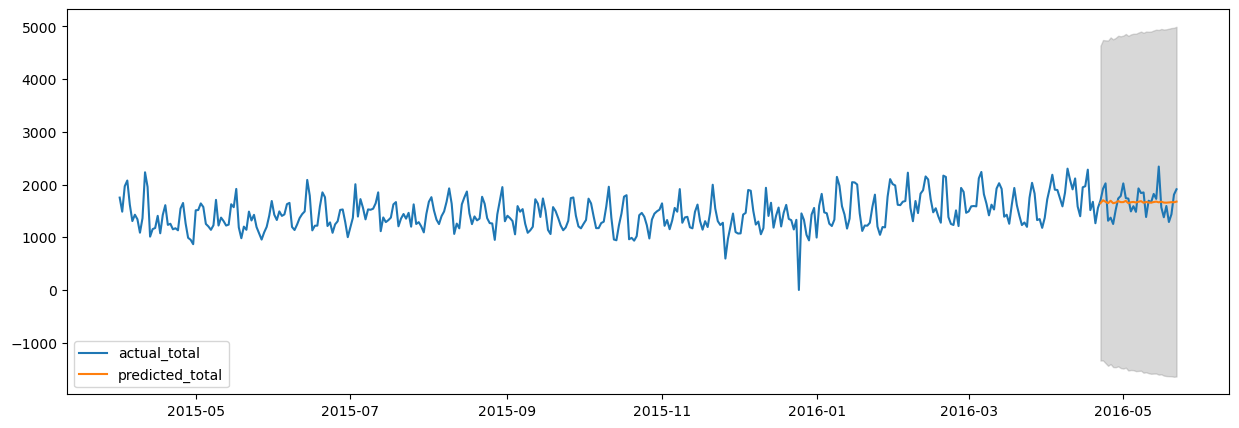

In [43]:
prediction_series = pd.Series(df_test2['predicted_total'],index=test.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(df_test2['actual_total'], label = 'actual_total')
ax.plot(prediction_series, label = 'predicted_total')
ax.fill_between(prediction_series.index,
                cf_total['low'],
                cf_total['high'],color='grey',alpha=.3)
ax.legend(loc='lower left')

The graph is stright due to too much noise probably better to devide them into different food category and stores. It would be best if you can use autoML as well since you cant use same model for all the items making prediction weak

In [44]:
# Filter rows containing 'MAE' in 'MAE or MAPE' column
mae_rows = MAPE_MAE_df[MAPE_MAE_df['MAE or MAPE'].str.contains('MAE')]

# Calculate the average of 'error' for rows with 'MAE'
average_mae = mae_rows['error'].mean()

# Filter rows containing 'MAPE'in 'MAE or MAPE' column
mape_rows = MAPE_MAE_df[MAPE_MAE_df['MAE or MAPE'].str.contains('MAPE')]

# Calculate the average of 'error' for rows with 'MAPE'
average_mape = mape_rows['error'].mean()

# Print the results
print(f'Average error for rows with "MAE": {average_mae}')
print(f'Average error for rows with "MAPE": {average_mape}')

Average error for rows with "MAE": nan
Average error for rows with "MAPE": nan


In [45]:
MAPE_MAE_df

Empty DataFrame
Columns: [id, error, MAE or MAPE]
Index: []

Use AutoML

In [46]:
# mljar-supervised package
from supervised.automl import AutoML
from sklearn.model_selection import train_test_split

In [47]:
%%time
multi_items = ['FOODS_3_083_WI_3_evaluation'] +['date']
# multi_item_and_calender =multi_items + calender +['date']
multi_item_and_calender =multi_items
df_test2 = df.loc[:,multi_item_and_calender]

# df_test2['actual_total'] = 0
# df_test2['predicted_total'] = 0
# for item in multi_items:
#     df_test2['actual_total'] = df_test2['actual_total'] + df_test2[item]
df2 = df_test2.loc[df_test2['date'] >='2016/04/01'].copy()
# df2 = df2.reset_index()
df2['date'] = pd.to_datetime(df2['date'], format = '%Y-%m-%d')

train_df = df2.loc[df2['date'] <='2016/05/01'].copy()
test_df = df2.loc[df2['date'] >'2016/05/01'].copy()

for item in multi_items:
    #Create test and train table
    # train, test = train_test_split(df2, test_size=0.2, shuffle=False)
    # df2_train = df2.drop(item, axis =1)
    X_train = train_df['date']
    Y_train = train_df.drop(item, axis = 1)
    X_test = test_df['date']
    Y_test = test_df.drop(item, axis = 1)
    # X_train, X_test, Y_train, Y_test = train_test_split(df2_train, df2[item], test_size=0.2, shuffle=False)
    # train_df = df2.loc['2015/04/01':'2016/04/21',random_item]

    target_column = item
    time_column = 'date' 
    automl = AutoML(results_path = "AutoML_{item}",
                    mode="Explain",
                    eval_metric='accuracy')
    print(1)
    automl.fit(X_train, Y_train)
    print(2)

C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
C:\Users\yohei\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
2023-12-19 23:58:15,092 supervised.exceptions ERROR Cannot set directory for AutoML. Directory 'AutoML_{item}' is not empty.


1


AutoMLException: Cannot set directory for AutoML. Directory 'AutoML_{item}' is not empty.

In [48]:
df_test2

FOODS_3_083_WI_3_evaluation       date
0                          303.68 2011-01-29
1                           56.94 2011-01-30
2                           18.98 2011-01-31
3                          303.68 2011-02-01
4                          360.62 2011-02-02
...                           ...        ...
1936                       112.38 2016-05-18
1937                       243.49 2016-05-19
1938                       224.76 2016-05-20
1939                       168.57 2016-05-21
1940                       149.84 2016-05-22

[1941 rows x 2 columns]

In [49]:
multi_items = ['FOODS_3_083_WI_3_evaluation', 'FOODS_3_084_WI_3_evaluation', 'FOODS_3_085_WI_3_evaluation'] 
multi_item_and_calender =multi_items + calender
df_test2 = df.loc[:,multi_item_and_calender]
df_test2

FOODS_3_083_WI_3_evaluation  FOODS_3_084_WI_3_evaluation  \
0                          303.68                         0.00   
1                           56.94                         0.00   
2                           18.98                         0.00   
3                          303.68                         0.00   
4                          360.62                         0.00   
...                           ...                          ...   
1936                       112.38                         0.00   
1937                       243.49                         3.96   
1938                       224.76                         3.96   
1939                       168.57                         5.94   
1940                       149.84                         3.96   

      FOODS_3_085_WI_3_evaluation  wm_yr_wk  wday  month  year  snap_CA  \
0                            0.00     11101     1      1  2011        0   
1                            0.00     11101     2      1  2011        0   
2                            0.00     11101     3      1  2011        0   
3                            0.00     11101     4      2  2011        1   
4                            0.00     11101     5      2  2011        1   
...                           ...       ...   ...    ...   ...      ...   
1936                         0.00     11616     5      5  2016        0   
1937                         2.98     11616     6      5  2016        0   
1938                         5.96     11616     7      5  2016        0   
1939                         0.00     11617     1      5  2016        0   
1940                         0.00     11617     2      5  2016        0   

      snap_TX  snap_WI  ...  wday  month  year  snap_CA  snap_TX  snap_WI  \
0           0        0  ...     1      1  2011        0        0        0   
1           0        0  ...     2      1  2011        0        0        0   
2           0        0  ...     3      1  2011        0        0        0   
3           1        0  ...     4      2  2011        1        1        0   
4           0        1  ...     5      2  2011        1        0        1   
...       ...      ...  ...   ...    ...   ...      ...      ...      ...   
1936        0        0  ...     5      5  2016        0        0        0   
1937        0        0  ...     6      5  2016        0        0        0   
1938        0        0  ...     7      5  2016        0        0        0   
1939        0        0  ...     1      5  2016        0        0        0   
1940        0        0  ...     2      5  2016        0        0        0   

      event_name_2_index  event_type_1_index  event_type_2_index  \
0                      1                   1                   1   
1                      1                   1                   1   
2                      1                   1                   1   
3                      1                   1                   1   
4                      1                   1                   1   
...                  ...                 ...                 ...   
1936                   1                   1                   1   
1937                   1                   1                   1   
1938                   1                   1                   1   
1939                   1                   1                   1   
1940                   1                   1                   1   

      weekday_index  
0                 2  
1                 3  
2                 1  
3                 5  
4                 6  
...             ...  
1936              6  
1937              4  
1938              0  
1939              2  
1940              3  

[1941 rows x 25 columns]

In [50]:
AutoML(eval_metric='accuracy', mode='Perform', results_path = 'AutoML_Perform')

AutoML(eval_metric='accuracy', mode='Perform', results_path='AutoML_Perform')

In [51]:
automl.report()

2023-12-19 23:58:15,698 supervised.exceptions ERROR Cannot set directory for AutoML. Directory 'AutoML_{item}' is not empty.


AutoMLException: Cannot set directory for AutoML. Directory 'AutoML_{item}' is not empty.

In [ ]:
automl.report()

In [ ]:
t

In [ ]:
automl = AutoML(
    results_path = "AutoML_Optuna",
    mode = "Optuna",
    algorithms = ["Xgboost"],
    optuna_time_budget = 120,
    eval_metric = "auc",
    boost_on_errors = False,
    train_ensemble = False
)
automl.fit(X_train, Y_train)
    

In [ ]:
probas = automl.predict_proba(X_test)
labels = autmo.predict(X_test)
autml.predict_all(X_test)